# Creating and Processing UVIS Bias Reference File
By Myles McKay
January 5, 2017




# #1 Import python packages 

In [3]:
import numpy as np
#!/usr/bin/env python
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
import matplotlib.patches as mpatches
import os
from multiprocessing import Pool
from wfc3tools import calwf3
from stsci.tools import teal
from astropy.table import Table
##%matplotlib inline 
import datetime as DT
import matplotlib.dates as dates
import parser
import pandas as pd
import skimage.morphology as morph
from skimage.morphology import disk
import matplotlib.dates as mdates
from astropy.table import Table, Column
from multiprocessing import Pool
import time

The following tasks in the wfc3tools package can be run with TEAL:
  calwf3    pstack    pstat     wf32d     wf3ccd    wf3cte    wf3ir     wf3rej


## Download raw science from same year as bias files and coresponding bias reference file

## Go to working directory

In [2]:
os.chdir('/grp/hst/wfc3u/mmckay/2016biasfiles/2016_crrg_flts/')

## Make needed folders and moving files

In [3]:
#def write1(filename = 'test1.txt'):
#    '''Write the results to a textfile'''
#    if not os.path.exists(filename): #If the file does not already exist...#
##        print ('writing a new file')
#        new_file = open(filename, 'w') # The 'w' denotes 'write'
#        new_file.write('ROOTNAME\tDATE-OBS\ttargname\tbinaxis1\tccdgain\tCCDAMP\tDetector\n') #write a header if needed
#    else:
##        print ('APPENDING NEW RESULTS')
#        new_file = open(filename, 'a') #The 'a' denotes 'append'
#
#    new_file.write('{}\t{}\t{}\t\t\t{}\t\t{}\t\t{}\t{}\n'.format(h[0].header['Rootname'] ,h[0].header['DATE-OBS'], h[0].header['targname'], h[1].header['binaxis1'],h[0].header['ccdgain'],h[0].header['CCDAMP'],h[0].header['Detector'])) #write the information
#    new_file.close() #close the file or it could get messed up    
    
def write_with_nan_c1_stats(filename = 'test1.txt'):
    '''Write the results to a textfile'''
    if not os.path.exists(filename): #If the file does not already exist...#
#        print ('writing a new file')
        new_file = open(filename, 'w') # The 'w' denotes 'write'
        new_file.write('#ROOTNAME	Date-Obs	Chip		Maximum					Minimum					Mean					Std_Dev					Median\n') #write a header if needed
    else:
#        print ('APPENDING NEW RESULTS')
        new_file = open(filename, 'a') #The 'a' denotes 'append'
    new_file.write('{}\t{}\t{}\t{}\t\t{}\t\t{}\t\t{}\t\t{}\n'.format(h[0].header['Rootname'],h[0].header['DATE-OBS'],'chip1',np.nanmax(sci_chip1),np.nanmin(sci_chip1), np.nanmean(sci_chip1),np.nanstd(sci_chip1),np.nanmedian(sci_chip1))) #write the information
    new_file.close() #close the file or it could get messed up

def write_with_nan_c2_stats(filename = 'test2.txt'):
    '''Write the results to a textfile'''
    if not os.path.exists(filename): #If the file does not already exist...#
#        print ('writing a new file')
        new_file = open(filename, 'w') # The 'w' denotes 'write'
        new_file.write('#ROOTNAME	Date-Obs	Chip		Maximum					Minimum					Mean					Std_Dev					Median\n') #write a header if needed
    else:
#        print ('APPENDING NEW RESULTS')
        new_file = open(filename, 'a') #The 'a' denotes 'append'
    new_file.write('{}\t{}\t{}\t{}\t\t{}\t\t{}\t\t{}\t\t{}\n'.format(h[0].header['Rootname'],h[0].header['DATE-OBS'],'chip2',np.nanmax(sci_chip2),np.nanmin(sci_chip2), np.nanmean(sci_chip2),np.nanstd(sci_chip2),np.nanmedian(sci_chip2))) #write the information
    new_file.close() #close the file or it could get messed up

In [ ]:
def write_with_nan_c1_stats(filename = 'test1.txt'):
    '''Write the results to a textfile'''

    if not os.path.exists(filename): #If the file does not already exist...#
#        print ('writing a new file')
        new_file = open(filename, 'w') # The 'w' denotes 'write'
        new_file.write('#ROOTNAME   Date-Obs    Chip        Maximum           Minimum       Mean                    Std_Dev                 Median              EXPTIME         PROPOSAL ID\n') #write a header if needed
    else:
        new_file = open(filename, 'a') #The 'a' denotes 'append'
    
#    list_of_files=sorted(glob.glob('Stacked*.fits'))
#    for im in list_of_files:
#        hdu = fits.open(im)
#        filter_name=hdu[0].header['filter']
#        sci_chip1=hdu[4].data
#        sci_chip2=hdu[1].data
#        dq_chip1=hdu[6].data
#        dq_chip2=hdu[3].data
        new_file.write('{}\t{}\t{}\t{}\t\t{}\t\t{}\t\t{}\t\t{}\t\t\t{}\t\t\t{}\n'.format(hdu[0].header['Rootname'],hdu[0].header['DATE-OBS'],'chip1',np.max(sci_chip1),np.min(sci_chip1), np.mean(sci_chip1),np.std(sci_chip1),np.median(sci_chip1),hdu[0].header['exptime'],hdu[0].header['PROPOSID'])) #write the information
        new_file.close() #close the file or it could get messed up
        

def write_with_nan_c2_stats(filename = 'test2.txt'):
    '''Write the results to a textfile'''
    if not os.path.exists(filename): #If the file does not already exist...#
#        print ('writing a new file')
        new_file = open(filename, 'w') # The 'w' denotes 'write'
        new_file.write('#ROOTNAME   Date-Obs    Chip        Maximum           Minimum       Mean                    Std_Dev                 Median              EXPTIME         PROPOSAL ID\n') #write a header if needed
    else:
        new_file = open(filename, 'a') #The 'a' denotes 'append'
    
#    list_of_files=sorted(glob.glob('Stacked*.fits'))
#    for im in list_of_files:
#        hdu = fits.open(im)
#        filter_name=hdu[0].header['filter']
#        sci_chip1=hdu[4].data
#        sci_chip2=hdu[1].data
#        dq_chip1=hdu[6].data
#        dq_chip2=hdu[3].data    
        new_file.write('{}\t{}\t{}\t{}\t\t{}\t\t{}\t\t{}\t\t{}\t\t\t{}\t\t\t{}\n'.format(hdu[0].header['Rootname'],hdu[0].header['DATE-OBS'],'chip2',np.max(sci_chip2),np.min(sci_chip2), np.mean(sci_chip2),np.std(sci_chip2),np.median(sci_chip2),hdu[0].header['exptime'],hdu[0].header['PROPOSID'])) #write the information
        new_file.close() #close the file or it could get messed up
#       hdu.close()



# #2 Calculate Statistics (Without DQ Array) 
## Print output to text file

In [ ]:
#os.chdir('/grp/hst/wfc3v/mmckay/2009biasfiles/newflt_stack_3/120_stack_raw_test2/')
##os.remove('2009_test20_bias_chip1_stats_noDQ.txt')
##os.remove('2009_test20_bias_chip2_stats_noDQ.txt')
#List1=[]
#List2=[]
##filename='2009_test20_stats.txt'
#print ('This is statistics for chip 1 without DQ')
#print('Name','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
#for fitsName1 in glob.glob('*flt.fits'):
#    fitsName1=np.array(fitsName1)
#    fitsName1=np.append(List1,fitsName1)
#    for i in range(len(fitsName1)):
#        h = fits.open(fitsName1[i])
#        sci_chip1=h[4].data
#        print(h[0].header['Rootname'],h[0].header['Date'],'   ','chip1','   ',np.max(sci_chip1),'  ',np.min(sci_chip1),'  ', np.mean(sci_chip1),'     ',np.std(sci_chip1),'   ',np.median(sci_chip1))
#        h.close()
#    write_without_nan_c1_stats(filename='2009_521_bias_chip1_stats_noDQ.txt')
#    
#
#        
#        
#        
#
#print('')
#print ('This is statistics for chip 2 without DQ')
#print('Name','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
#for fitsName2 in glob.glob('*flt.fits'):
#    fitsName2=np.array(fitsName2)
#    fitsName2=np.append(List2,fitsName2)
#    for i in range(len(fitsName2)):
#        h = fits.open(fitsName2[i])
#        sci_chip2=h[1].data
#        print(h[0].header['Rootname'],h[0].header['Date'],'   ','chip2','   ',np.max(sci_chip2),'  ',np.min(sci_chip2),'  ', np.mean(sci_chip2),'     ',np.std(sci_chip2),'   ',np.median(sci_chip2))
#        h.close()
#    write_without_nan_c2_stats(filename='2009_521_bias_chip2_stats_noDQ.txt')
        

# Cosmic-ray growth (2 pixel radius)

# #3. Calculate Statistics (with DQ array) & Histograms

In [70]:
#os.chdir('/grp/hst/wfc3u/mmckay/CR_growth_comparision/CR_only_growth_test/test2/')
List1=[]
List2=[]
Year='2010a'
print ('{} Bias File Chip1 SCI Histograms'.format(Year))
print('Name','         ','Date','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
for fitsName1 in sorted(glob.glob('*flt.fits')):
    fitsName1=np.array(fitsName1)
    fitsName1=np.append(List1,fitsName1)
    for i in range(len(fitsName1)):
        h = fits.open(fitsName1[i])
        sci_chip1=h[4].data
        dq_chip1=h[6].data
        sci_chip1[dq_chip1 !=0]=np.nan
        print(h[0].header['Rootname'],h[0].header['Date-obs'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
        h.close()
        
        bins=np.linspace(0.0,4.0,50)
        n,bins,patches=plt.hist(sci_chip1[~np.isnan(sci_chip1)], 50, facecolor='g', alpha=0.50) 
       
        
        #Titles for the histogram
        plt.title("{} Chip1 SCI Histograms".format(h[0].header['rootname']))
        plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip1),"%.3f" % np.nanmin(sci_chip1)))
        plt.ylabel("Frequency")
        plt.yscale('log')
        plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip1),"%.3f" %np.nanstd(sci_chip1)), xy=(225, 175), xycoords='axes points',
                    size=12, bbox=dict(boxstyle='round', fc='w'))
        plt.savefig('{}_chip1_scidq_hist.png'.format(h[0].header['Rootname']))
        plt.clf()
    write_with_nan_c1_stats(filename='{}_bias_chip1_stats_DQ.txt'.format(Year))
      
        
        
print('')
print ('{} Bias File Chip2 SCI Histograms'.format(Year))
print('Name','         ','Date','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
for fitsName2 in sorted(glob.glob('*flt.fits')):
    fitsName2=np.array(fitsName2)
    fitsName2=np.append(List2,fitsName2)
    for i in range(len(fitsName2)):
        h = fits.open(fitsName2[i])
        sci_chip2=h[1].data
        dq_chip2=h[3].data
        sci_chip2[dq_chip2 !=0]=np.nan
        print(h[0].header['Rootname'],h[0].header['Date-obs'],'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
        h.close()
        
        bins=np.linspace(0.0,4.0,50) 
        n,bins,patches=plt.hist(sci_chip2[~np.isnan(sci_chip2)], 50, facecolor='pink', alpha=0.50) 
        
        
        #Titles for the histogram
        plt.title("{} Chip2 SCI Histograms".format(h[0].header['rootname']))
        plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip2),"%.3f" % np.nanmin(sci_chip2)))
        plt.ylabel("Frequency")
        plt.yscale('log')
        plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip2),"%.3f" %np.nanstd(sci_chip2)), xy=(225, 175), xycoords='axes points',
                    size=12, bbox=dict(boxstyle='round', fc='w'))
        plt.savefig('{}_chip2_scidq_hist.png'.format(h[0].header['Rootname']))
        plt.clf()
    write_with_nan_c2_stats(filename='{}_bias_chip2_stats_DQ.txt'.format(Year)) 
    
os.system('mkdir chip1_histograms chip2_histograms')
os.system('mv ./*chip1_scidq_hist.png ./chip1_histograms')
os.system('mv ./*chip2_scidq_hist.png ./chip2_histograms')

2010a Bias File Chip1 SCI Histograms
Name           Date           Chip      Max          Min       Mean          Std Dev      Median
ice121sxq 2014-01-02     chip1     10.6592    -8.98101    0.0960523       2.02539     0.127458
ice121syq 2014-01-02     chip1     10.27    -8.98796    0.117913       2.02459     0.170132
ice124vmq 2014-01-02     chip1     14.3226    -8.83885    0.111479       2.03483     0.242895
ice124voq 2014-01-02     chip1     10.5562    -8.76432    0.0933706       2.01662     0.338797
ice131s7q 2014-01-30     chip1     11.4055    -8.85071    0.121317       2.00983     0.162905
ice131s8q 2014-01-30     chip1     11.2526    -8.87166    0.126385       1.98897     0.188202
ice134x6q 2014-01-31     chip1     11.1758    -8.82167    0.161156       2.01277     0.325363
ice134x7q 2014-01-31     chip1     11.3    -8.95549    0.138186       2.01211     0.108204
ice141m6q 2014-02-26     chip1     11.0861    -8.95722    0.167765       2.01431     0.270119
ice141m7q 2014-02-26   

0

# 3sigma Clippling (3 interations)
## clip=mu +/- 3*sigma

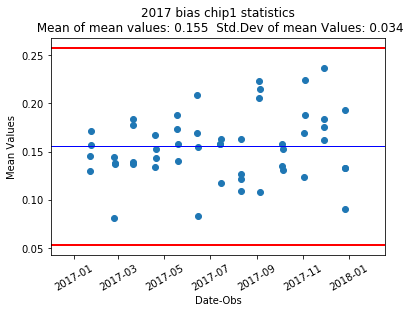

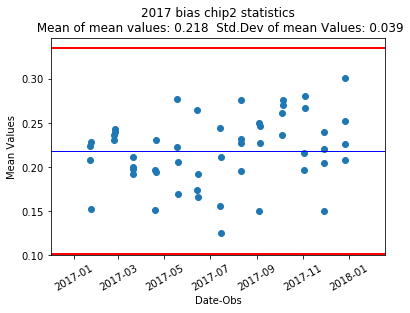

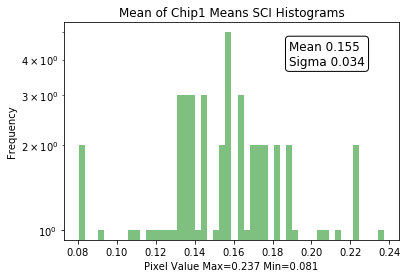

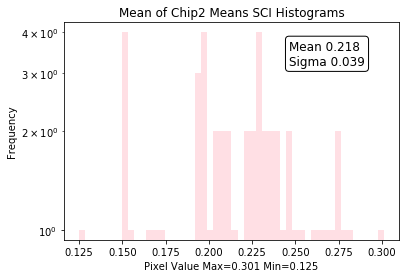

In [2]:
os.chdir('/grp/hst/wfc3r/mmckay/2017biasfiles/nongrown_flts/')
list=sorted(glob.glob('*flt.fits'))
Year='2017'
file_number=[]
file_date=[]
file_mean1=[]
file_mean2=[]
i=0
for im in list:
    h=fits.open(im)
    name=h[0].header['rootname']
    date=h[0].header['date-obs']
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    i+=1
    file_number=np.append(file_number,i)
    file_date=np.append(file_date,date)
    file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
    file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))

#    print(i)
file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
Mean_c1=np.mean(file_mean1)
STD_c1 =np.std(file_mean1)

Mean_c2=np.mean(file_mean2)
STD_c2 =np.std(file_mean2)

upper_sigma_c1=Mean_c1 + 3.0*STD_c1
lower_sigma_c1=Mean_c1 - 3.0*STD_c1

upper_sigma_c2=Mean_c2 + 3.0*STD_c2
lower_sigma_c2=Mean_c2 - 3.0*STD_c2


plt.scatter(file_date,file_mean1)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip1 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_c1, "%.3f" %STD_c1))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_c1, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip1 data plot.png'.format(Year))
plt.show()
plt.clf()

plt.scatter(file_date,file_mean2)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip2 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_c2, "%.3f" %STD_c2))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_c2, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip2 data plot.png'.format(Year))
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(file_mean1[~np.isnan(file_mean1)], 50, facecolor='g', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip1 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(file_mean1),"%.3f" % np.min(file_mean1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_c1,"%.3f" %STD_c1), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip1_scidq_hist.png'.format(Year))
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(file_mean2[~np.isnan(file_mean2)], 50, facecolor='pink', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip2 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(file_mean2),"%.3f" % np.min(file_mean2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_c2,"%.3f" % STD_c2), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip2_scidq_hist.png'.format(Year))
plt.show()
plt.clf()




In [42]:
#os.chdir('/grp/hst/wfc3u/mmckay/write_test/')
os.system('mkdir 1st_interation_sigma_clip 2nd_interation_sigma_clip 3rd_interation_sigma_clip')

0

In [45]:
#os.chdir('/grp/hst/wfc3u/mmckay/2010biasfiles/set1_all_crrej_flt_files/set1_flt/')
#chip1_file = open("2010a_bias_chip1_stats_DQ.txt","r")
#chip2_file = open("2010a_bias_chip2_stats_DQ.txt","r")

Folder= './2nd_interation_sigma_clip/'
Year='2016'

#chip1_lines=chip1_file.readlines()
#chip1_file.close()
#chip1_lines=np.array(chip1_lines)
#print(type(chip1_lines))
##chip1_file = open("2010a_bias_chip1_stats_DQ.txt","w")
#i=0
#for line in chip1_lines:   
#    i+=1
#    print(i,line[0:9])
#    if line[0:9]=='ib919qy2q':
#        del chip1_lines[3:5+1]
#        
##        print(i,line)

print ('{} Bias File Chip1 SCI Histograms'.format(Year))
print('Name','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
i=1
list_of_files= glob.glob('*flt.fits')
for im in list_of_files:
    h = fits.open(im)
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    i+=1
    # print(h[0].header['Rootname'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
    if np.nanmean(sci_chip1) >= upper_sigma_c1 or np.nanmean(sci_chip1) <= lower_sigma_c1:
        print(i, h[0].header['Rootname'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
        os.system('mv {}_flt.fits {}'.format(h[0].header['Rootname'],Folder))
    if np.nanmean(sci_chip2) >= upper_sigma_c2 or np.nanmean(sci_chip2) <= lower_sigma_c2: 
        print(i, h[0].header['Rootname'],'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
        os.system('mv {}_flt.fits {}'.format(h[0].header['Rootname'],Folder))
    h.close()
print('DONE!!!!!')


2016 Bias File Chip1 SCI Histograms
Name           Chip      Max          Min       Mean          Std Dev      Median
DONE!!!!!


In [39]:
pwd

'/grp/hst/wfc3u/mmckay/2015biasfiles/2015_crrg_flts'

# #4. Stacking bias files(Mean or Median)
## *This part may require multiprocessing pending on the number of files in directory
## Recommend running this code as a script in terminal

In [31]:
os.system('mkdir nongrown_flts')
os.system('mv i*.fits nongrown_flts') 

0

# #5. Calculate Staistics and histogram of stacked images 

In [26]:
os.chdir('/grp/hst/wfc3r/mmckay/2009biasfiles/2009_crrg_fits/')
new=fits.open('bias_crr_err_stacked_files.fits')
Year='2015'

sci_chip1=new[0].data
sci_chip2=new[2].data
err_chip1=new[1].data
err_chip2=new[3].data
Name='stacked_image'
new.close()
r=5

print('New reference file stats')
print('Name','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
print(Name,'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
print(Name,'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
print('')
print(Name,'   ','chip1','   ',np.nanmax(err_chip1),'  ',np.nanmin(err_chip1),'  ', np.nanmean(err_chip1),'     ',np.nanstd(err_chip1),'   ',np.nanmedian(err_chip1))
print(Name,'   ','chip2','   ',np.nanmax(err_chip2),'  ',np.nanmin(err_chip2),'  ', np.nanmean(err_chip2),'     ',np.nanstd(err_chip2),'   ',np.nanmedian(err_chip2))

bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip1[~np.isnan(sci_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
plt.title("{} Bias File Chip1 SCI Histogram".format(Year))
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip1),"%.3f" % np.nanmin(sci_chip1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip1),"%.3f" %np.nanstd(sci_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{}_mean_stacked_chip1_sci_hist.png'.format(Year))
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip2[~np.isnan(sci_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
plt.title("{} Bias File Chip2 SCI Histogram".format(Year))
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip2),"%.3f" % np.nanmin(sci_chip2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip2),"%.3f" %np.nanstd(sci_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{}_mean_stacked_chip2_sci_hist.png'.format(Year))
plt.clf()
#--------------------------------------------------------------------------------------------------------------------------------------------------------

bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip1[~np.isnan(err_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
plt.title("{} Bias File Chip1 ERR Histogram".format(Year))
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip1),"%.3f" %np.nanstd(err_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{}_mean_stacked_chip1_err_hist.png'.format(Year))
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip2[~np.isnan(err_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
plt.title("2010 Bias File Chip2 ERR Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip2),"%.3f" %np.nanstd(err_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{}_mean_stacked_chip2_err_hist.png'.format(Year))
plt.clf()


New reference file stats
Name           Chip      Max          Min       Mean          Std Dev      Median
stacked_image     chip1     4.90813493729    -5.17940425873    0.0756328829593       0.102791990081     0.0755576432392
stacked_image     chip2     7.22276973724    -4.84021949768    0.032702741461       0.125275180413     0.0341967233159

stacked_image     chip1     2.59255480766    0.090155844663    0.0947191749737       0.010327332478     0.0946531851274
stacked_image     chip2     2.97234678268    0.0924657263455    0.0970438089102       0.00800578188811     0.0970267019847


# Create 2D plot of new and old bias reference files

combi


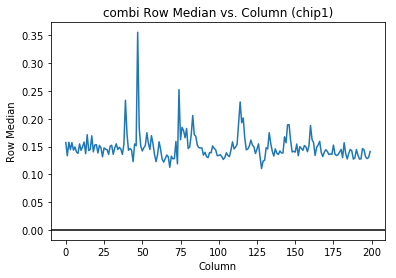

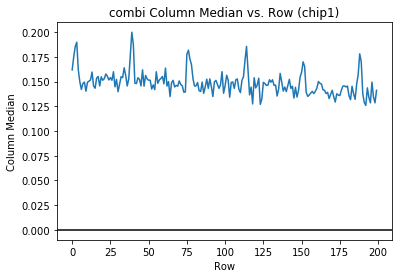

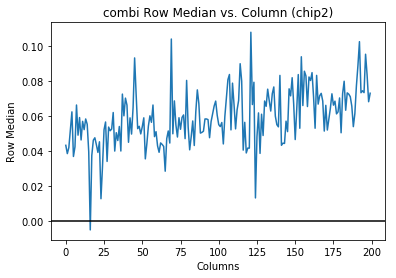

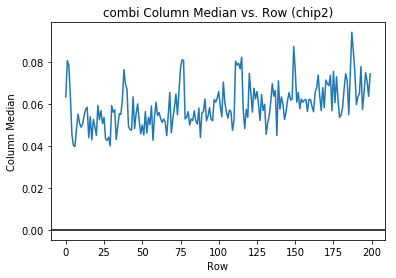

In [41]:
os.chdir('/grp/hst/wfc3r/mmckay/2009-2016_even_split/stacked_files')
files=glob.glob('combined*.fits')

for im in files:
    hdr1=fits.open(im)
    Year=im[0:5]
    print(Year[0:10])
    c1_data=hdr1[0].data
    c2_data=hdr1[2].data
    
    c1_data = c1_data*1.5
    c2_data = c2_data*1.5
    hdr1.close()
    
#    plotdata1=c1_data[0:2048,0:4096].reshape(2048,4096)
#    plotdata2=c2_data[0:2048,0:4096].reshape(2048,4096)
    plotdata1=c1_data[800:1000,900:1100]
    plotdata2=c2_data[800:1000,900:1100]
    where_are_nans1 =np.isnan(plotdata1)
    where_are_nans2 =np.isnan(plotdata2)
    plotdata1[where_are_nans1] = 0
    plotdata2[where_are_nans2] = 0
    c1_row_median=np.median(plotdata1,0)
    c2_row_median=np.median(plotdata2,0)
    c1_col_median=np.median(plotdata1,1)
    c2_col_median=np.median(plotdata2,1)
    
    
    #---------------
    #   Chip1
    #---------------
    
    
    plt.plot(c1_row_median)
    plt.title('{} Row Median vs. Column (chip1)'.format(Year))
    plt.xlabel('Column')
    plt.ylabel('Row Median')
#    plt.axis([-200,4500,-0.2,0.4])
    plt.axhline(y=0, color='black')
    plt.savefig('{}_2D_row_med_chip1.png'.format(Year))
    plt.show()
    plt.clf()
    
    plt.plot(c1_col_median)
    plt.title('{} Column Median vs. Row (chip1)'.format(Year))
    plt.xlabel('Row')
    plt.ylabel('Column Median')
    #plt.axis([-200,4500,-0.4,1.0])
    plt.axhline(y=0, color='black')
    plt.savefig('{}_2D_col_med_chip1.png'.format(Year))
    plt.show()
    plt.clf()
    
    #---------------
    #   Chip2
    #---------------
    
    
    plt.plot(c2_row_median)
    plt.title('{} Row Median vs. Column (chip2)'.format(Year))
    plt.xlabel('Columns')
    plt.ylabel('Row Median')
#    plt.axis([-200,4500,-0.2,0.4])
    plt.axhline(y=0, color='black')
    plt.savefig('{}_2D_row_med_chip2.png'.format(Year))
    plt.show()
    plt.clf()
        
   

    plt.plot(c2_col_median)
    plt.title('{} Column Median vs. Row (chip2)'.format(Year))
    plt.xlabel('Row')
    plt.ylabel('Column Median')
    #plt.axis([-200,4500,-1.0,1.5])
    plt.axhline(y=0, color='black')
    plt.savefig('{}_2D_col_med_chip2.png'.format(Year))
    plt.show()
    plt.clf()




In [14]:
import plotly.plotly as py
from plotly.graph_objs import *

#data = [Bar(x=df.School,
#            y=df.gap)]
c1_col_median=list(c1_col_median)
py.iplot(c1_col_median,filename='jupyter/basic_bar')

PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

Invalid entry found in 'data' at index, '0'

Path To Error: ['data'][0]

Valid items for 'data' at path ['data'] under parents ['figure']:
    ['Area', 'Bar', 'Box', 'Candlestick', 'Carpet', 'Choropleth',
    'Contour', 'Contourcarpet', 'Heatmap', 'Heatmapgl', 'Histogram',
    'Histogram2d', 'Histogram2dcontour', 'Mesh3d', 'Ohlc', 'Parcoords',
    'Pie', 'Pointcloud', 'Scatter', 'Scatter3d', 'Scattercarpet',
    'Scattergeo', 'Scattergl', 'Scattermapbox', 'Scatterternary',
    'Surface']

Entry should subclass dict.

# #6. Put data in correct reference file fits format

In [7]:
os.chdir('/grp/hst/wfc3u/mmckay/all_bia_iref_files/')
os.system('cp /grp/hst/cdbs/iref/u8a1254ti_bia.fits')
hdu_ref=fits.open('u8a1254ti_bia.fits')
hdu_ref.info()
hdu_ref[0].header['*']

Filename: u8a1254ti_bia.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     359   ()      
  1  SCI         ImageHDU        35   (4206, 2070)   float32   
  2  ERR         ImageHDU        35   (4206, 2070)   float32   
  3  DQ          ImageHDU        35   (4206, 2070)   int16   
  4  SCI         ImageHDU        35   (4206, 2070)   float32   
  5  ERR         ImageHDU        35   (4206, 2070)   float32   
  6  DQ          ImageHDU        35   (4206, 2070)   int16   


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2010-08-10T12:54:58'                                                 
NEXTEND =                    6 / Number of standard extensions                  
DATE    = '2010-08-02T18:51:24'                                                 
FILENAME= 'u8a1254ti_bia.fits'                                                  
FILETYPE= 'BIAS    '           / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

In [2]:
os.chdir('/grp/hst/wfc3u/mmckay/2009-2016_even_split/stacked_files/')
os.system('cp /grp/hst/cdbs/iref/u6n1741hi_bia.fits ./')
hdu_ref=fits.open('u6n1741hi_bia.fits',mode='update')
hdu_new=fits.open('combined_mean_stacked_file.fits')

hdu_ref.info()
hdu_new.info()

ref_chip1=hdu_ref[4].data
err_chip1=hdu_ref[5].data
chip1_dq=hdu_ref[6].data

ref_chip2=hdu_ref[1].data
err_chip2=hdu_ref[2].data
chip2_dq=hdu_ref[3].data


med_chip1=hdu_new[0].data
new_err_chip1=hdu_new[1].data
med_chip2=hdu_new[2].data
new_err_chip2=hdu_new[3].data


#--------------------------------------------------	
#Replacing current data with new masterbias data
#--------------------------------------------------	
where_are_nans1 = np.isnan(med_chip1)
where_are_nans2 = np.isnan(med_chip2)
med_chip1[where_are_nans1] = 0
med_chip2[where_are_nans2] = 0

where_are_nans_err1 =np.isnan(new_err_chip1)
where_are_nans_err2 =np.isnan(new_err_chip2)
new_err_chip1[where_are_nans_err1] = 0
new_err_chip2[where_are_nans_err2] = 0

ref_chip1[19:2070,25:2073]=med_chip1[0:2051,0:2048]
ref_chip1[19:2070,2133:4181]=med_chip1[0:2051,2048:]
ref_chip2[0:2051,25:2073]=med_chip2[0:2051,0:2048]
ref_chip2[0:2051,2133:4181]=med_chip2[0:2051,2048:]

chip1_dq=np.zeros([2070,4206], dtype=np.int16)
chip2_dq=np.zeros([2070,4206], dtype=np.int16)

err_chip1[19:2070,25:2073]=new_err_chip1[0:2051,0:2048]
err_chip1[19:2070,2133:4181]=new_err_chip1[0:2051,2048:]
err_chip2[0:2051,25:2073]=new_err_chip2[0:2051,0:2048]
err_chip2[0:2051,2133:4181]=new_err_chip2[0:2051,2048:]

print(ref_chip1[0:2,24:26])	
print(ref_chip1[0:2,2132:2134])	
print(ref_chip2[18:20,24:26])
print(ref_chip2[18:20,2132:2134])

hdu_ref.close()
hdu_new.close()

hdu_ref=fits.open('u6n1741hi_bia.fits')
hdu_ref.info()
hdu_ref.close()

os.system('mv u6n1741hi_bia.fits final_bias_ref.fits')
#-------------------------------------------------
#Editing header of file of science raw file
#-------------------------------------------------


#hdu_raw=fits.open('ib8d2rkbq_raw.fits',mode='update')
#hdu_raw[0].header['BIASFILE']='u6n1741hi_bia.fits'
#hdu_raw[0].header['BIASCORR']='PERFORM'
#hdu_raw[0].header['PCTECORR']='OMIT'
#hdu_raw[0].header['SNKCFILE']='iref$zcv2057oi_snk.fits'
#hdu_raw.close()

#calwf3('ib8d2rkbq_raw.fits')

Filename: u6n1741hi_bia.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     359   ()      
  1  SCI         ImageHDU        35   (4206, 2070)   float32   
  2  ERR         ImageHDU        35   (4206, 2070)   float32   
  3  DQ          ImageHDU        35   (4206, 2070)   int16   
  4  SCI         ImageHDU        35   (4206, 2070)   float32   
  5  ERR         ImageHDU        35   (4206, 2070)   float32   
  6  DQ          ImageHDU        35   (4206, 2070)   int16   
Filename: combined_mean_stacked_file.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       6   (4096, 2051)   float64   
  1              ImageHDU         7   (4096, 2051)   float64   
  2              ImageHDU         7   (4096, 2051)   float64   
  3              ImageHDU         7   (4096, 2051)   float64   
[[ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]]
[[ 0.         -0.03307302]
 [ 0.         -0.06292405]]
[[ 0.          0.11608487]
 [

0

In [7]:
os.chdir('/grp/hst/wfc3r/mmckay/Final_quad_sub_refernce_files/')
hdu_ref=fits.open('2017_quad_sub_final_bias_ref.fits',mode='update')
hdu_ref[0].header['*']

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'COMMON 2016_2'      / FITS file originator                           
IRAF-TLM= '2010-06-23T17:41:35'                                                 
NEXTEND =                    6 / Number of standard extensions                  
DATE    = '2018-02-06T15:31:48'                                                 
FILENAME= 'u6n1741hi_bia.fits'                                                  
FILETYPE= 'BIAS    '           / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

In [6]:
hdu_ref.close()

In [5]:
#------------------------------------------------------
#2009 Bias reference file header
#------------------------------------------------------

prihdr=hdu_ref[0].header
del prihdr['history']
del prihdr['comment']
del prihdr['DESCRIP']
prihdr['APERTURE']='QUAD_CORNER_SUBARRAYS'
prihdr['DESCRIP']='Bias intended for use with subarrays.-----------' 
prihdr['CCDAMP']='SINGLE_AMP'
prihdr['DATE']='2018-02-06T15:31:48'
prihdr['CAL_VER']='3.4 (28-Sep-2016)'
prihdr['ORIGIN']='COMMON 2016_2'
prihdr['OPUS_VER']='HSTIO/CFITSIO March 2010'
prihdr['USEAFTER']='Jan 01 2017 00:00:00'
prihdr['PEDIGREE']='INFLIGHT 01/01/2017 31/12/2017'
prihdr['TIME-OBS']='18:19:06'
prihdr['comment']='Reference file created by Myles McKay.'
prihdr['HISTORY']=''
prihdr['HISTORY']=' CCD parameters table:                                                   ' 
prihdr['HISTORY']='   reference table iref$t291659mi_ccd.fits                               ' 
prihdr['HISTORY']='     GROUND                                                              ' 
prihdr['HISTORY']='     UVIS-1 CCD characteristics from TV3 data                            ' 
prihdr['HISTORY']='     From TV3 data                                                       ' 
prihdr['HISTORY']=' Uncertainty array initialized.                                          ' 
prihdr['HISTORY']=' DQICORR complete ...                                                    ' 
prihdr['HISTORY']='   values checked for saturation                                         ' 
prihdr['HISTORY']='   DQ array initialized ...                                              ' 
prihdr['HISTORY']='   reference table iref$u5d2012li_bpx.fits                               ' 
prihdr['HISTORY']='     INFLIGHT 23/06/2009 15/10/2009                                      ' 
prihdr['HISTORY']='     Based on SMOV and Cycle 17 data.----------------------------------- ' 
prihdr['HISTORY']=' BLEVCORR complete; bias level from overscan was subtracted.             ' 
prihdr['HISTORY']=' BLEVCORR includes correction for drift along lines.                     ' 
prihdr['HISTORY']='   Overscan region table:                                                ' 
prihdr['HISTORY']='   reference table iref$q911321oi_osc.fits                               ' 
prihdr['HISTORY']='     GROUND                                                              ' 
prihdr['HISTORY']='     WFC3 normal overscan CCD data compatible                            ' 
prihdr['HISTORY']='------------------------------------------------------------------------ ' 
prihdr['HISTORY']='OPUS_VER= HSTDP 2015_3  / OPUS software system version number  '
prihdr['HISTORY']='CSYS_VER= hstdp-2016.2 / Calibration software system version id'                                     
prihdr['HISTORY']=''
prihdr['HISTORY']='This file was generated using calwf3 Version 3.4 (28-Sep-2016)'         
prihdr['HISTORY']='with the following files:'                                      

files=glob.glob('/grp/hst/wfc3u/mmckay/2017biasfiles/nongrown_flts/*flt.fits')
for im in files:
    h=fits.open(im)
    prihdr['HISTORY']= '{}{}'.format(h[0].header['Rootname'],'_raw.fits')

# #7. Validating that the data was transfered properly

In [29]:
os.chdir('/grp/hst/wfc3u/mmckay/Final_reference_files/')
new=fits.open('2009_final_bias_ref.fits')
sci_chip1=new[4].data
sci_chip2=new[1].data

dq_chip1=new[6].data
dq_chip2=new[3].data

err_chip1=new[5].data
err_chip2=new[2].data

sci_chip1[sci_chip1 ==0]=np.nan
sci_chip2[sci_chip2 ==0]=np.nan

err_chip1[err_chip1 ==0]=np.nan
err_chip2[err_chip2 ==0]=np.nan
Name=new[0].header['filename']
new.close()
r=5
print('Check data statistics')
print('Name','      \t\t','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
print(Name,'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
print(Name,'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
print('')
print(Name,'   ','chip1','   ',np.nanmax(err_chip1),'  ',np.nanmin(err_chip1),'  ', np.nanmean(err_chip1),'     ',np.nanstd(err_chip1),'   ',np.nanmedian(err_chip1))
print(Name,'   ','chip2','   ',np.nanmax(err_chip2),'  ',np.nanmin(err_chip2),'  ', np.nanmean(err_chip2),'     ',np.nanstd(err_chip2),'   ',np.nanmedian(err_chip2))

bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip1[~np.isnan(sci_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip1 SCI Histogram")
plt.title("Chip1 Check SCI Data Transfer")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip1),"%.3f" % np.nanmin(sci_chip1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip1),"%.3f" %np.nanstd(sci_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('chip1_sci_check.png')
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip2[~np.isnan(sci_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip2 SCI Histogram")
plt.title("Chip2 Check SCI Data Transfer")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip2),"%.3f" % np.nanmin(sci_chip2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip2),"%.3f" %np.nanstd(sci_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
#plt.savefig('New_mean_stacked_chip2_sci_hist.png')
plt.savefig('chip2_sci_check.png')
plt.clf()
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip1[~np.isnan(err_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip1 SCI Histogram")
plt.title("Chip1 Check ERR Data Transfer")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip1),"%.3f" %np.nanstd(err_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('chip1_err_check.png')
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip2[~np.isnan(err_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip2 SCI Histogram")
plt.title("Chip2 Check ERR Data Transfer")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip2),"%.3f" %np.nanstd(err_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
#plt.savefig('New_mean_stacked_chip2_sci_hist.png')
plt.savefig('chip2_err_check.png')
plt.clf()

Check data statistics
Name       		 Chip      Max          Min       Mean          Std Dev      Median
u6n1741hi_bia.fits     chip1     4.90813    -5.1794    0.0756329       0.102792     0.0755576
u6n1741hi_bia.fits     chip2     7.22277    -4.84022    0.0327027       0.125275     0.0341967

u6n1741hi_bia.fits     chip1     2.59255    0.0901558    0.0947192       0.0103273     0.0946532
u6n1741hi_bia.fits     chip2     2.97235    0.0924657    0.0970438       0.00800578     0.0970267


# #8. Compare initial data set with transferred data

In [50]:
#os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/vetting_test/')
initial_new=fits.open('bias_crr_err_stacked_files.fits')
initial_sci_chip1=initial_new[0].data
initial_sci_chip2=initial_new[2].data
initial_err_chip1=initial_new[1].data
initial_err_chip2=initial_new[3].data
#initial_sci_chip1[initial_sci_chip1 ==0]=np.nan
#initial_sci_chip2[initial_sci_chip2 ==0]=np.nan
#initial_err_chip1[initial_err_chip1 ==0]=np.nan
#initial_err_chip2[initial_err_chip2 ==0]=np.nan

trans_new=fits.open('final_bias_ref.fits')
trans_sci_chip1=trans_new[4].data
trans_sci_chip2=trans_new[1].data
trans_err_chip1=trans_new[5].data
trans_err_chip2=trans_new[2].data
trans_sci_chip1[trans_sci_chip1 ==0]=np.nan
trans_sci_chip2[trans_sci_chip2 ==0]=np.nan
trans_err_chip1[trans_err_chip1 ==0]=np.nan
trans_err_chip2[trans_err_chip2 ==0]=np.nan


quadA_diff=initial_sci_chip1[0:2051,0:2048]-trans_sci_chip1[19:2070,25:2073]
quadB_diff=initial_sci_chip1[0:2051,2048:]-trans_sci_chip1[19:2070,2133:4181]
quadC_diff=initial_sci_chip2[0:2051,0:2048]-trans_sci_chip2[0:2051,25:2073]
quadD_diff=initial_sci_chip2[0:2051,2048:]-trans_sci_chip2[0:2051,2133:4181]

print(np.nanmean(quadA_diff),np.nanmean(quadB_diff),np.nanmean(quadC_diff),np.nanmean(quadD_diff))


3.96588735765e-12 1.13491641156e-12 3.04351864992e-13 5.00946070703e-12


# #9. Final test for reference file delivery

In [10]:
Year='2017'
os.system('mkdir calwf3_test')
os.system('cp ./final_bias_ref.fits ./calwf3_test/')
os.system('cp /grp/hst/wfc3u/mmckay/calwf3_test_files/{}*raw.fits ./calwf3_test/'.format(Year))
os.chdir('./calwf3_test')

In [13]:
os.chdir('/grp/hst/wfc3r/mmckay/calwf3_test/')
file='2017_iddt11fxq_raw.fits'
hdu_raw=fits.open(file, mode='update')
hdu_raw[0].header['BIASFILE']='2017_final_bias_ref.fits'
hdu_raw[0].header['BIASCORR']='PERFORM'
hdu_raw[0].header['PCTECORR']='OMIT'
hdu_raw[0].header['SNKCFILE']='iref$zcv2057oi_snk.fits'
hdu_raw.close()

calwf3(file)






CALWF3BEG*** CALWF3 -- Version 3.4.1(Apr-10-2017) ***

Begin    26-Feb-2018 15:18:09 EST





Input    2017_iddt11fxq_raw.fits

loading asn



LoadAsn:  Processing SINGLE exposure

Trying to open 2017_iddt11fxq_raw.fits...

Read in Primary header from 2017_iddt11fxq_raw.fits...





CALWF3BEG*** WF3CCD -- Version 3.4.1(Apr-10-2017) ***

Begin    26-Feb-2018 15:18:14 EST

Creating new trailer file `2017_iddt11fxq.tra'.

Input:   2017_iddt11fxq_raw.fits

Output:  2017_iddt11fxq_blv_tmp.fits

Trying to open 2017_iddt11fxq_raw.fits...

Read in Primary header from 2017_iddt11fxq_raw.fits...

APERTURE UVIS-CENTER

FILTER   F625W

DETECTOR UVIS





Imset 1  Begin 15:18:14 EST



CCDTAB   iref$t291659mi_ccd.fits

CCDTAB   PEDIGREE=GROUND

CCDTAB   DESCRIP =UVIS-1 CCD characteristics from TV3 data

CCDTAB   DESCRIP =From TV3 data

    Uncertainty array initialized,

    readnoise =3.03,3.13,3.08,3.18

    gain =1.56,1.56,1.56,1.56

    default bias levels = 2556.4,2543.8,2503.3,2605.7



D

In [19]:
os.chdir('/grp/hst/wfc3r/mmckay/Final_quad_sub_refernce_files/')
fits.open('2017_quad_sub_final_bias_ref.fits').verify('warn')

In [20]:
len(fits.getheader('2017_quad_sub_final_bias_ref.fits')['DESCRIP'])==67

True

In [21]:
fits.info('2017_quad_sub_final_bias_ref.fits')

Filename: 2017_quad_sub_final_bias_ref.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     284   ()      
  1  SCI           1 ImageHDU        35   (4206, 2070)   float32   
  2  ERR           1 ImageHDU        35   (4206, 2070)   float32   
  3  DQ            1 ImageHDU        35   (4206, 2070)   int16   
  4  SCI           2 ImageHDU        35   (4206, 2070)   float32   
  5  ERR           2 ImageHDU        35   (4206, 2070)   float32   
  6  DQ            2 ImageHDU        35   (4206, 2070)   int16   


In [56]:
cd ..

/grp/hst/wfc3u/mmckay/2016biasfiles/2016_crrg_flts


# Extra ----------------------------------------------------------------------------------


In [6]:
file=glob.glob('crrg_id0n41vuq_flt.fits')
for im in file:
    hdu=fits.open(im)
    rootname=hdu[0].header['rootname']
    sci_chip1=hdu[4].data
    sci_chip2=hdu[1].data
    dq_chip1=hdu[6].data
    dq_chip2=hdu[3].data
    
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    
    print(rootname,sci_chip2[410:418,313:328])

id0n41vuq [[ 2.63006973 -1.36980152  3.63032722 -1.36954415  0.63058454 -3.36928678
  -2.36915803  0.6309706   0.63109928 -2.36877203 -1.3686434  -4.36851454
  -0.36838603 -1.3682574  -5.36812878]
 [ 2.63002801  1.63015664  0.63028526 -3.36958599  1.63054264  1.63067126
  -0.36920002  1.63092864 -1.36894262 -0.36881396 -3.36868525 -1.36855662
  -0.36842793 -3.36829925 -0.36817056]
 [-1.37001395  2.63011479 -0.36975664  2.63037205 -0.36949927 -0.36937061
   1.63075805  2.63088679 -1.36898458  3.63114405  2.63127279 -1.36859858
  -1.36846983 -3.36834121  0.63178754]
 [ 1.62994409 -1.36992729  2.63020134 -1.36966991 -1.36954117  1.63058746
  -1.3692838   1.63084483  1.63097358 -1.3688978  -1.36876917  0.63135958
   1.6314882  -0.36838308 -1.36825442]
 [-1.37009788  2.63003087 -1.3698405  -2.36971188  2.63041687 -0.36945441
  -0.36932573 -1.36919701 -0.36906838 -1.36893976  2.63118887  1.63131762
  -1.36855364 -0.36842498 -0.3682963 ]
 [ 1.62986028 -1.37001109  1.63011765  2.6302464   1.63

2016-01-01
2016-01-01
2016-01-25
2016-01-25
2016-01-26
2016-01-26
2016-02-22
2016-02-22
2016-02-23
2016-02-23
2016-03-24
2016-03-24
2016-03-25
2016-03-25
2016-04-19
2016-04-19
2016-04-20
2016-04-20
2016-05-21
2016-05-21
2016-05-22
2016-05-22
2016-06-15
2016-06-15
2016-06-16
2016-06-16
2016-07-12
2016-07-12
2016-07-14
2016-07-14
2016-08-11
2016-08-11
2016-08-12
2016-08-12
2016-09-06
2016-09-07
2016-09-07
2016-10-07
2016-10-07
2016-10-09
2016-10-09
2016-11-04
2016-11-04
2016-11-05
2016-11-05
2016-11-30
2016-11-30
2016-11-30
2016-11-30
2016-12-29
2016-12-29
2016-12-30
2016-12-30


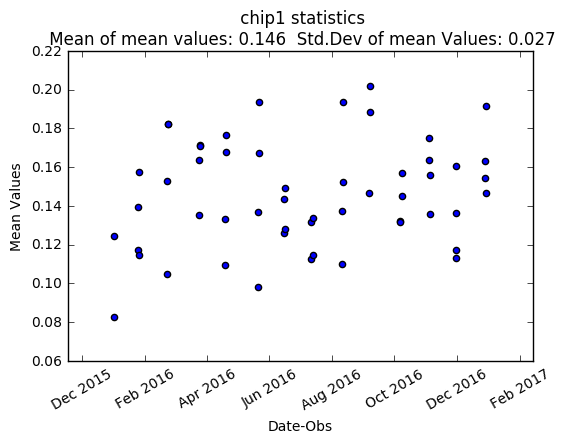

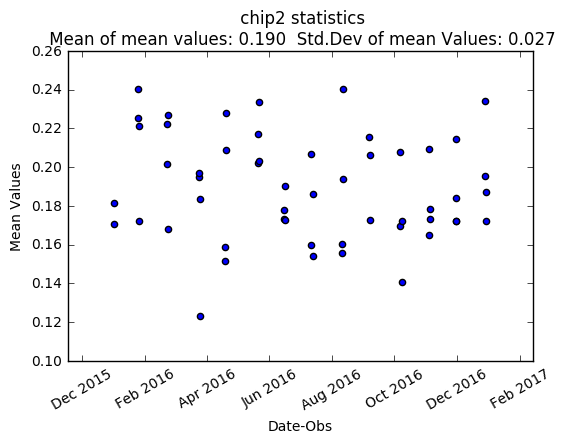

In [9]:
os.chdir('/grp/hst/wfc3u/mmckay/test/')
list=sorted(glob.glob('*flt.fits')) 
file_mean1=[]
file_mean2=[]
file_date=[]
for im in list:
    h = fits.open(im)
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    date=h[0].header['date-obs']
    file_date=np.append(file_date,date)
    file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
    file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))
    
file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
Mean_c1=np.mean(file_mean1)
STD_c1 =np.std(file_mean1)

Mean_c2=np.mean(file_mean2)
STD_c2 =np.std(file_mean2)

plt.scatter(file_date,file_mean1)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title(' chip1 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Mean_c1, "%.3f" %STD_c1))
plt.xticks(rotation=30)
plt.savefig('Statistics chip1 data plot.png')
plt.show()
plt.clf()


plt.scatter(file_date,file_mean2)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title(' chip2 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Mean_c2, "%.3f" %STD_c2))
plt.xticks(rotation=30)
plt.savefig('Statistics chip2 data plot.png')
plt.show()
plt.clf()    

In [ ]:
os.chdir('/grp/hst/wfc3r/mmckay/2009-2016_data/')
list=sorted(glob.glob('*flt.fits')) 
file_mean1=[]
file_mean2=[]
file_date=[]
file_mean1_top=[]
file_mean1_bottom=[]
file_mean2_top=[]
file_mean2_bottom=[]
for im in list:
    h = fits.open(im)
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    date=h[0].header['date-obs']
    
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    
    sci_chip1_top=sci_chip1[1500:1900,:]
    sci_chip1_bottom=sci_chip1[100:500,:]
    sci_chip2_top=sci_chip2[1500:1900,:]
    sci_chip2_bottom=sci_chip2[100:500,:]
    
    
    file_date=np.append(file_date,date)
    file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
    file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))
    
    file_mean1_top=np.append(file_mean1_top,np.nanmean(sci_chip1_top))
    file_mean1_bottom=np.append(file_mean1_bottom,np.nanmean(sci_chip1_bottom))
    
    file_mean2_top=np.append(file_mean2_top,np.nanmean(sci_chip2_top))
    file_mean2_bottom=np.append(file_mean2_bottom,np.nanmean(sci_chip2_bottom))

    
file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
x = mdates.date2num(file_date)

Mean_c1=np.mean(file_mean1)
STD_c1 =np.std(file_mean1)

Mean_c1_top=np.mean(file_mean1_top)
Mean_c1_bottom=np.mean(file_mean1_bottom)

Mean_c2=np.mean(file_mean2)
STD_c2 =np.std(file_mean2)

Mean_c2_top=np.mean(file_mean2_top)
Mean_c2_bottom=np.mean(file_mean2_bottom)

polyfit1_top=np.polyfit(x,file_mean1_top,1)
polyfit1_top_data=((polyfit1_top[0]*x + polyfit1_top[1]))

polyfit1_bottom=np.polyfit(x,file_mean1_bottom,1)
polyfit1_bottom_data=((polyfit1_bottom[0]*x + polyfit1_bottom[1]))
#plt.scatter(file_date,file_mean1)
chip1_upper_region =plt.scatter(file_date,file_mean1_top,color='green')
chip1_lower_region =plt.scatter(file_date,file_mean1_bottom,color='red')
chip1_total_average=plt.axhline(y=Mean_c1,linewidth=1, color='black')
#chip1_upper_average=plt.axhline(y=Mean_c1_top,linewidth=3, color='green')
#chip1_lower_average=plt.axhline(y=Mean_c1_bottom,linewidth=3, color='red')
plt.plot(x, polyfit1_top_data,'b',linewidth=3)
plt.plot(x, polyfit1_bottom_data,'orange',linewidth=3)
plt.ylim(-0.25,0.5)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title(' Chip1 statistics \n Mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Mean_c1, "%.3f" %STD_c1))
plt.xticks(rotation=30)
#plt.legend((chip1_upper_region,chip1_lower_region,chip1_total_average,chip1_upper_average,chip1_lower_average),
#           ('Upper region', 'Lower region','Total Average','Upper Region Average', 'Lower Region Average'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=2,
#           fontsize=8)
plt.savefig('Statistics chip1 data plot.png')
plt.show()
plt.clf()

polyfit2_top=np.polyfit(x,file_mean2_top,1)
polyfit2_top_data=((polyfit2_top[0]*x + polyfit2_top[1]))

polyfit2_bottom=np.polyfit(x,file_mean2_bottom,1)
polyfit2_bottom_data=((polyfit2_bottom[0]*x + polyfit2_bottom[1]))


#plt.scatter(file_date,file_mean2)
chip2_upper_region =plt.scatter(file_date,file_mean2_top,color='red')
chip2_lower_region =plt.scatter(file_date,file_mean2_bottom,color='green')
chip2_total_average=plt.axhline(y=Mean_c2, xmin=-100,xmax=100,linewidth=1, color='black')
#chip2_upper_average=plt.axhline(y=Mean_c2_top, xmin=-100,xmax=100,linewidth=3, color='red')
#chip2_lower_average=plt.axhline(y=Mean_c2_bottom, xmin=-100,xmax=100,linewidth=3, color='green')
plt.plot(x, polyfit2_top_data,'orange',linewidth=3)
plt.plot(x, polyfit2_bottom_data,'blue',linewidth=3)
plt.ylim(-0.3,0.4)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title(' Chip2 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Mean_c2, "%.3f" %STD_c2))
plt.xticks(rotation=30)
#plt.legend((chip2_upper_region,chip2_lower_region,chip2_total_average,chip2_upper_average,chip2_lower_average),
#           ('Upper region', 'Lower region','Total Average','Upper Region Average', 'Lower Region Average'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=2,
#           fontsize=8)
plt.savefig('Statistics chip2 data plot.png')
plt.show()
plt.clf()    

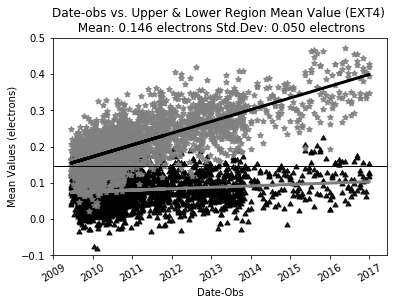

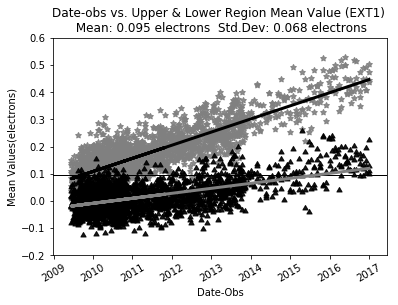

4873.185821056366


In [7]:
#os.chdir('/grp/hst/wfc3r/mmckay/2009-2016_data/')
#list_of_files=sorted(glob.glob('*flt.fits')) 
#file_mean1=[]
#file_mean2=[]
#file_date=[]
#file_mean1_top=[]
#file_mean1_bottom=[]
#file_mean2_top=[]
#file_mean2_bottom=[]


t0 = time.time()


def bias_2009_2016_year_vs_mean_plot(list_of_files):
    file_mean1=[]
    file_mean2=[]
    file_date=[]
    file_mean1_top=[]
    file_mean1_bottom=[]
    file_mean2_top=[]
    file_mean2_bottom=[]
    for im in list_of_files:
        #print(im)
        hdu = fits.open(im)
        sci_chip1=hdu[4].data
        sci_chip2=hdu[1].data
        dq_chip1=hdu[6].data
        dq_chip2=hdu[3].data
        
        sci_chip1 = sci_chip1 * 1.5
        sci_chip2 = sci_chip2 * 1.5
        
        sci_chip1[dq_chip1 !=0]=np.nan
        sci_chip2[dq_chip2 !=0]=np.nan
        
        hdu.close()
 
        sci_chip1_top=sci_chip1[1500:1900,:]
        sci_chip1_bottom=sci_chip1[100:500,:]
        sci_chip2_top=sci_chip2[1500:1900,:]
        sci_chip2_bottom=sci_chip2[100:500,:]
        
        date=hdu[0].header['date-obs']
        file_date=np.append(file_date,date)
        file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
        file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))
        
        file_mean1_top=np.append(file_mean1_top,np.nanmean(sci_chip1_top))
        file_mean1_bottom=np.append(file_mean1_bottom,np.nanmean(sci_chip1_bottom))
        
        file_mean2_top=np.append(file_mean2_top,np.nanmean(sci_chip2_top))
        file_mean2_bottom=np.append(file_mean2_bottom,np.nanmean(sci_chip2_bottom))
        #print(file_mean1,file_mean2_top)
    return(file_date,file_mean1,file_mean1_bottom,file_mean1_top,file_mean2,file_mean2_bottom,file_mean2_top)
#--------------------------------------------------------------------------------------

os.chdir('/grp/hst/wfc3r/mmckay/09-16_nonCRgrown_FLT_files')
list_of_files = sorted(glob.glob('*flt.fits'))
list_of_files=list_of_files
p=Pool(6)
#p.map(file_date,file_mean1,file_mean1_bottom,file_mean1_top,file_mean2,file_mean2_bottom,file_mean2_top = bias_2009_2016_year_vs_mean_plot(list_of_files))

file_date,file_mean1,file_mean1_bottom,file_mean1_top,file_mean2,file_mean2_bottom,file_mean2_top = bias_2009_2016_year_vs_mean_plot(list_of_files)
#print(file_date, file_mean1)
#-------------------------------------------------------------------------------------
#Creating Year vs. Mean plots

file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
x = mdates.date2num(file_date)

Mean_c1=np.mean(file_mean1)
STD_c1 =np.std(file_mean1)

Mean_c1_top=np.mean(file_mean1_top)
Mean_c1_bottom=np.mean(file_mean1_bottom)

Mean_c2=np.mean(file_mean2)
STD_c2 =np.std(file_mean2)

Mean_c2_top=np.mean(file_mean2_top)
Mean_c2_bottom=np.mean(file_mean2_bottom)

polyfit1_top=np.polyfit(x,file_mean1_top,1)
polyfit1_top_data=((polyfit1_top[0]*x + polyfit1_top[1]))

polyfit1_bottom=np.polyfit(x,file_mean1_bottom,1)
polyfit1_bottom_data=((polyfit1_bottom[0]*x + polyfit1_bottom[1]))

#plt.scatter(file_date,file_mean1)
chip1_upper_region =plt.scatter(file_date,file_mean1_top,color='black', marker=(3, 1),alpha=0.9)
chip1_lower_region =plt.scatter(file_date,file_mean1_bottom,color='grey',marker=(5, 1),alpha=0.9)
chip1_total_average=plt.axhline(y=Mean_c1,linewidth=1, color='black')
#chip1_upper_average=plt.axhline(y=Mean_c1_top,linewidth=3, color='green')
#chip1_lower_average=plt.axhline(y=Mean_c1_bottom,linewidth=3, color='red')
plt.plot(x, polyfit1_top_data,'grey',linewidth=3)
plt.plot(x, polyfit1_bottom_data,'black',linewidth=3)

plt.ylim(-0.1,0.5)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values (electrons)')
plt.title('Date-obs vs. Upper & Lower Region Mean Value (EXT4) \n Mean: {} electrons Std.Dev: {} electrons'.format("%.3f" %Mean_c1, "%.3f" %STD_c1))
plt.xticks(rotation=30)
#plt.legend((chip1_upper_region,chip1_lower_region,chip1_total_average,chip1_upper_average,chip1_lower_average),
#           ('Upper region', 'Lower region','Total Average','Upper Region Average', 'Lower Region Average'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=2,
#           fontsize=8)
plt.savefig('ext4_date_vs_region_mean.png')
plt.show()
plt.clf()

polyfit2_top=np.polyfit(x,file_mean2_top,1)
polyfit2_top_data=((polyfit2_top[0]*x + polyfit2_top[1]))

polyfit2_bottom=np.polyfit(x,file_mean2_bottom,1)
polyfit2_bottom_data=((polyfit2_bottom[0]*x + polyfit2_bottom[1]))


#plt.scatter(file_date,file_mean2)
chip2_upper_region =plt.scatter(file_date,file_mean2_top,color='grey',marker=(5, 1),alpha=0.9)
chip2_lower_region =plt.scatter(file_date,file_mean2_bottom,color='black',marker=(3, 1),alpha=0.9)
chip2_total_average=plt.axhline(y=Mean_c2, xmin=-100,xmax=100,linewidth=1, color='black')
#chip2_upper_average=plt.axhline(y=Mean_c2_top, xmin=-100,xmax=100,linewidth=3, color='red')
#chip2_lower_average=plt.axhline(y=Mean_c2_bottom, xmin=-100,xmax=100,linewidth=3, color='green')
plt.plot(x, polyfit2_top_data,'black',linewidth=3)
plt.plot(x, polyfit2_bottom_data,'grey',linewidth=3)
plt.ylim(-0.2,0.6)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values(electrons)')
plt.title('Date-obs vs. Upper & Lower Region Mean Value (EXT1) \n Mean: {} electrons  Std.Dev: {} electrons'.format("%.3f" %Mean_c2, "%.3f" %STD_c2))
plt.xticks(rotation=30)
#plt.legend((chip2_upper_region,chip2_lower_region,chip2_total_average,chip2_upper_average,chip2_lower_average),
#           ('Upper region', 'Lower region','Total Average','Upper Region Average', 'Lower Region Average'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=2,
#           fontsize=8)
plt.savefig('ext1_date_vs_region_mean.png')
plt.show()
plt.clf()    


#print('ext4top_line_fit_data', polyfit1_top_data[0])
#print('ext4top_line_fit_data', polyfit1_top_data[1989])

t1 = time.time()

total = t1-t0
print(total)

In [8]:
#Ext4 early readout fits percent difference(blue line fit)
print('ext4top_line_fit_data', polyfit1_top_data[0], polyfit1_top_data.shape)
print('ext4top_line_fit_data', polyfit1_top_data[2479])

polyfit1_top_data_first_val = polyfit1_top_data[0]
polyfit1_top_data_last_val = polyfit1_top_data[2479]

pcdiff_polyfit1_top_data = ((polyfit1_top_data_last_val - polyfit1_top_data_first_val) / polyfit1_top_data_first_val) * 100
print(pcdiff_polyfit1_top_data)

#Ext4 late readout fits percent difference(orange line fit)
print('ext4bottom_line_fit_data', polyfit1_bottom_data[0], polyfit1_bottom_data.shape)
print('ext4bottom_line_fit_data', polyfit1_bottom_data[2479])

polyfit1_bottom_data_first_val = polyfit1_bottom_data[0]
polyfit1_bottom_data_last_val = polyfit1_bottom_data[2479]

pcdiff_polyfit1_bottom_data = ((polyfit1_bottom_data_last_val - polyfit1_bottom_data_first_val) / polyfit1_bottom_data_first_val) * 100     
print(pcdiff_polyfit1_bottom_data)



#Ext1 late readout fits percent difference(orange line fit)
print('ext1top_line_fit_data', polyfit2_top_data[0], polyfit2_top_data.shape)
print('ext1top_line_fit_data', polyfit2_top_data[2479])

polyfit2_top_data_first_val = polyfit2_top_data[0]
polyfit2_top_data_last_val = polyfit2_top_data[2479]

pcdiff_polyfit2_top_data = ((polyfit2_top_data_last_val - polyfit2_top_data_first_val) / polyfit2_top_data_first_val) * 100
print(pcdiff_polyfit2_top_data)

#Ext1 early readout fits percent difference(blue line fit)
print('ext1bottom_line_fit_data', polyfit2_bottom_data[0], polyfit2_bottom_data.shape)
print('ext1bottom_line_fit_data', polyfit2_bottom_data[2479])

polyfit2_bottom_data_first_val = polyfit2_bottom_data[0]
polyfit2_bottom_data_last_val = polyfit2_bottom_data[2479]

pcdiff_polyfit2_bottom_data = ((polyfit2_bottom_data_last_val - polyfit2_bottom_data_first_val) / polyfit2_bottom_data_first_val) * 100     
print(pcdiff_polyfit2_bottom_data)

ext4top_line_fit_data 0.074237065224 (2480,)
ext4top_line_fit_data 0.103461229939
39.3660021804
ext4bottom_line_fit_data 0.155595672829 (2480,)
ext4bottom_line_fit_data 0.399114304989
156.50732937
ext1top_line_fit_data 0.083820521319 (2480,)
ext1top_line_fit_data 0.446485436398
432.668407894
ext1bottom_line_fit_data -0.0178477557851 (2480,)
ext1bottom_line_fit_data 0.120145223791
-773.167121054


In [15]:
1-(-1)

2

In [54]:
ls

crrg_ib918ac0q_flt.fits  crrg_ib91lwd6q_flt.fits  crrg_ibtx14x9q_flt.fits
crrg_ib918cehq_flt.fits  crrg_ib91lxatq_flt.fits  crrg_ibtx14xjq_flt.fits
crrg_ib918dlgq_flt.fits  crrg_ib91lxauq_flt.fits  crrg_ibtx21c2q_flt.fits
crrg_ib918dlhq_flt.fits  crrg_ib91lya4q_flt.fits  crrg_ibtx21c3q_flt.fits
crrg_ib918ekxq_flt.fits  crrg_ib91lzkdq_flt.fits  crrg_ibtx21cuq_flt.fits
crrg_ib918fedq_flt.fits  crrg_ib91lzkeq_flt.fits  crrg_ibtx24icq_flt.fits
crrg_ib918feeq_flt.fits  crrg_ib91m0j6q_flt.fits  crrg_ibtx24idq_flt.fits
crrg_ib918gdqq_flt.fits  crrg_ib91m1pzq_flt.fits  crrg_ibtx24ijq_flt.fits
crrg_ib918hk4q_flt.fits  crrg_ib91m1q1q_flt.fits  crrg_ibtx31rxq_flt.fits
crrg_ib918hk5q_flt.fits  crrg_ib91m2ojq_flt.fits  crrg_ibtx31ryq_flt.fits
crrg_ib918ijlq_flt.fits  crrg_ib91m3z4q_flt.fits  crrg_ibtx31s5q_flt.fits
crrg_ib918lssq_flt.fits  crrg_ib91m3z5q_flt.fits  crrg_ibtx34w4q_flt.fits
crrg_ib918lstq_flt.fits  crrg_ib91m4yuq_flt.fits  crrg_ibtx34w5q_flt.fits
crrg_ib918nvzq_flt.fits  crrg_ib91m5cw

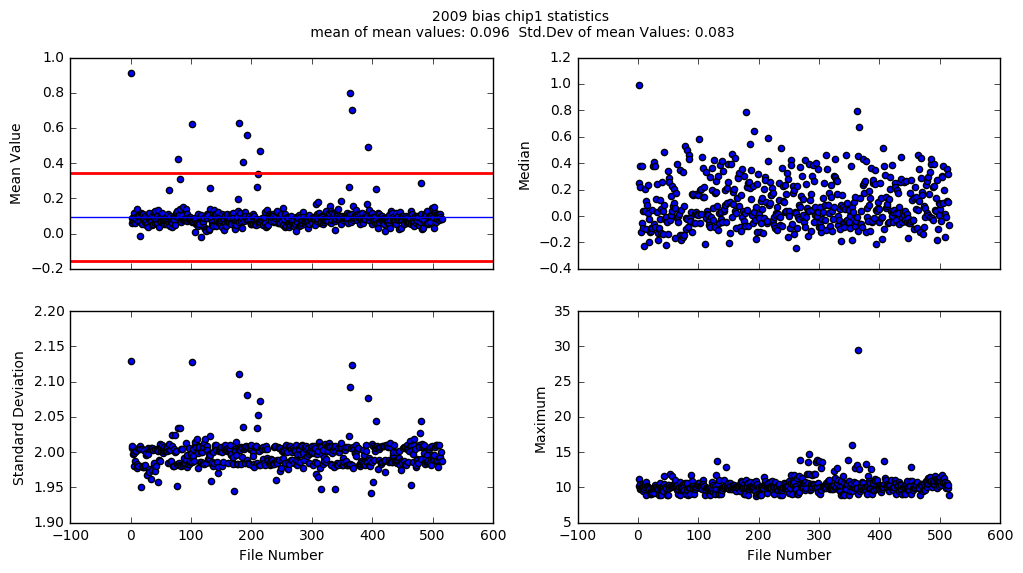

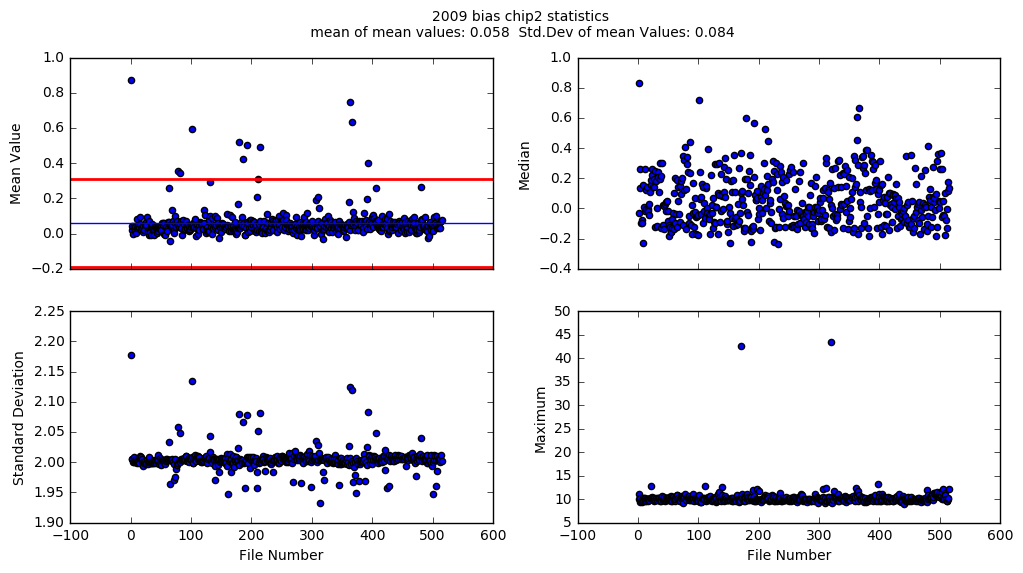

In [4]:
#os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/vetting_test/')
list=sorted(glob.glob('*flt.fits'))
file_number=[]
i=0
for im in list:
    h=fits.open(im)
    name=h[0].header['rootname']
    i+=1
    file_number=np.append(file_number,i)
table1=np.loadtxt('test2010a_bias_chip1_stats_DQ.txt',usecols=(3,4,5,6,7))
table2=np.loadtxt('test2010a_bias_chip2_stats_DQ.txt',usecols=(3,4,5,6,7))

Max_c1=table1[:,0]
Min_c1=table1[:,1]
Mean_c1=table1[:,2]
STD_c1=table1[:,3]
Med_c1=table1[:,4]

Total_c1_Mean=np.mean(Mean_c1)
Total_c1_Std_Dev=np.std(Mean_c1)
c1_pos_sigma3=Total_c1_Mean + 3.0*Total_c1_Std_Dev
c1_neg_sigma3=Total_c1_Mean - 3.0*Total_c1_Std_Dev
fig, [(ax0, ax2), (ax1, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col')
fig.suptitle('2009 bias chip1 statistics\n mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Total_c1_Mean, "%.3f" %Total_c1_Std_Dev))

ax0.scatter(file_number,Mean_c1)
ax0.axhline(y=c1_pos_sigma3, xmin=-100,xmax=100,linewidth=2, color='red')
ax0.axhline(y=c1_neg_sigma3, xmin=-100,xmax=100,linewidth=2, color='red')
ax0.axhline(y=Total_c1_Mean, xmin=-100,xmax=100,linewidth=1, color='blue')

ax0.set_ylabel('Mean Value')
ax1.set_xlabel('File Number')
ax3.set_xlabel('File Number')

ax1.set_ylabel('Standard Deviation')
ax1.scatter(file_number,STD_c1)

ax2.set_ylabel('Median')
ax2.scatter(file_number,Med_c1)

ax3.set_ylabel('Maximum')
ax3.scatter(file_number,Max_c1)
plt.savefig('Statistics chip1 data plot.png')
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
Max_c2=table2[:,0]
Min_c2=table2[:,1]
Mean_c2=table2[:,2]
STD_c2=table2[:,3]
Med_c2=table2[:,4]

Total_c2_Mean=np.mean(Mean_c2)
Total_c2_Std_Dev=np.std(Mean_c2)

c2_pos_sigma3=Total_c2_Mean + 3.0*Total_c2_Std_Dev
c2_neg_sigma3=Total_c2_Mean - 3.0*Total_c2_Std_Dev

fig, [(ax0, ax2), (ax1, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col')
fig.suptitle('2009 bias chip2 statistics\n mean of mean values: {}  Std.Dev of mean Values: {}'.format("%.3f" %Total_c2_Mean, "%.3f" %Total_c2_Std_Dev))

ax0.scatter(file_number,Mean_c2)
ax0.axhline(y=c2_pos_sigma3, xmin=-100,xmax=100,linewidth=2, color='red')
ax0.axhline(y=c2_neg_sigma3, xmin=-100,xmax=100,linewidth=2, color='red')
ax0.axhline(y=Total_c2_Mean, xmin=-100,xmax=100,linewidth=1, color='blue')

ax0.set_ylabel('Mean Value')
ax1.set_xlabel('File Number')
ax3.set_xlabel('File Number')

ax1.set_ylabel('Standard Deviation')
ax1.scatter(file_number,STD_c2)

ax2.set_ylabel('Median')
ax2.scatter(file_number,Med_c2)

ax3.set_ylabel('Maximum')
ax3.scatter(file_number,Max_c2)
plt.savefig('Statistics chip2 data plot.png')





In [ ]:
#os.chdir('/grp/hst/wfc3u/mmckay/2010biasfiles/set1_all_crrej_flt_files/')
list=sorted(glob.glob('*flt.fits'))
Year='2010a'
file_number=[]
file_date=[]
file_mean1=[]
file_mean2=[]
i=0
for im in list:
    h=fits.open(im)
    name=h[0].header['rootname']
    date=h[0].header['date-obs']
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    sci_chip1[dq_chip1 !=0]=np.nan
    sci_chip2[dq_chip2 !=0]=np.nan
    i+=1
    file_number=np.append(file_number,i)
    file_date=np.append(file_date,date)
    file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
    file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))

    print(i)
file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
Mean_c1=np.mean(file_mean1)
STD_c1 =np.std(file_mean1)

Mean_c2=np.mean(file_mean2)
STD_c2 =np.std(file_mean2)

upper_sigma_c1=Mean_c1 + 3.0*STD_c1
lower_sigma_c1=Mean_c1 - 3.0*STD_c1

upper_sigma_c2=Mean_c2 + 3.0*STD_c2
lower_sigma_c2=Mean_c2 - 3.0*STD_c2


plt.scatter(file_date,file_mean1)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip1 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_c1, "%.3f" %STD_c1))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_c1, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip1 data plot.png'.format(Year))
plt.show()
plt.clf()

plt.scatter(file_date,file_mean2)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip2 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_c2, "%.3f" %STD_c2))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_c2, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip2 data plot.png'.format(Year))
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(file_mean1[~np.isnan(file_mean1)], 50, facecolor='g', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip1 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(Mean_c1),"%.3f" % np.min(Mean_c1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_c1,"%.3f" %STD_c1), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip1_scidq_hist.png'.format(Year))
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(file_mean2[~np.isnan(file_mean2)], 50, facecolor='pink', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip2 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(Mean_c2),"%.3f" % np.min(Mean_c2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_c2,"%.3f" % STD_c2), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip2_scidq_hist.png'.format(Year))
plt.show()
plt.clf()




chip1 total Mean= 0.07533991803285037
chip1 total STD= 0.02648671853563708

chip2 total Mean=  0.032310124474158076
chip2 total STD=  0.0244824724172397
0.15480007364 -0.00412023757406 0.105757541726 -0.0411372927776


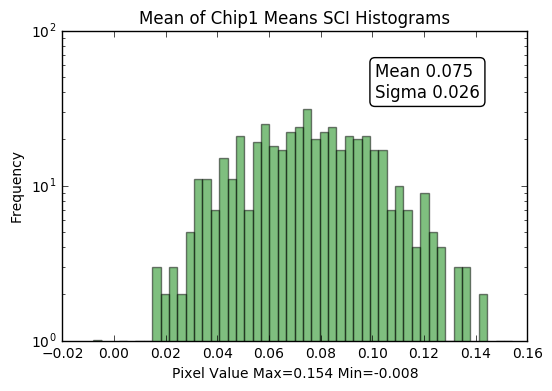

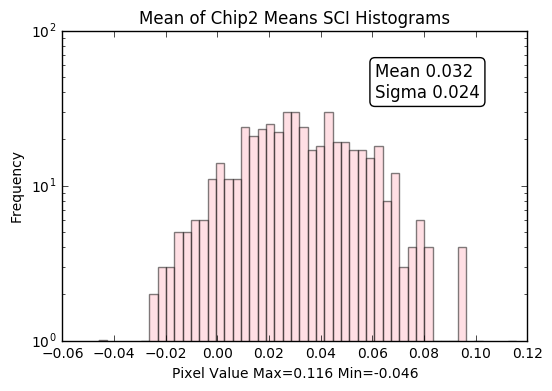

In [29]:
#Working on a faster way to do sigma clipping
#os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/vetting_test/')
list=sorted(glob.glob('*flt.fits'))
file_number=[]
Year='2010a'
i=0
for im in list:
    h=fits.open(im)
    name=h[0].header['rootname']
    i+=1
    file_number=np.append(file_number,i)
table1=np.loadtxt('2010a_bias_chip1_stats_DQ.txt',usecols=(3,4,5,6,7))
table2=np.loadtxt('2010a_bias_chip2_stats_DQ.txt',usecols=(3,4,5,6,7))

Max_c1=table1[:,0]
Min_c1=table1[:,1]
Mean_c1=table1[:,2]
STD_c1=table1[:,3]
Med_c1=table1[:,4]

Max_c2=table2[:,0]
Min_c2=table2[:,1]
Mean_c2=table2[:,2]
STD_c2=table2[:,3]
Med_c2=table2[:,4]



Mean_of_Mean_c1=np.mean(Mean_c1)
STD_of_Mean_c1=np.std(Mean_c1)

Mean_of_Mean_c2=np.mean(Mean_c2)
STD_of_Mean_c2=np.std(Mean_c2)

upper_sigma_c1=Mean_of_Mean_c1 + 3.0*STD_of_Mean_c1
lower_sigma_c1=Mean_of_Mean_c1 - 3.0*STD_of_Mean_c1

upper_sigma_c2=Mean_of_Mean_c2 + 3.0*STD_of_Mean_c2
lower_sigma_c2=Mean_of_Mean_c2 - 3.0*STD_of_Mean_c2


plt.scatter(file_number,Mean_c1)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip1 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_of_Mean_c1, "%.3f" %STD_of_Mean_c1))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c1, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_of_Mean_c1, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip1 data plot.png'.format(Year))
plt.show()
plt.clf()

plt.scatter(file_number,Mean_c2)
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.title('{} bias chip2 statistics\n Mean of mean values: {}  Std.Dev of mean Values: {}'.format(Year,"%.3f" %Mean_of_Mean_c2, "%.3f" %STD_of_Mean_c2))
plt.xticks(rotation=30)
plt.axhline(y=upper_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=lower_sigma_c2, xmin=-100,xmax=100,linewidth=2, color='red')
plt.axhline(y=Mean_of_Mean_c2, xmin=-100,xmax=100,linewidth=1, color='blue')
plt.savefig('{} Statistics chip2 data plot.png'.format(Year))
plt.xlabel('Date-Obs')
plt.ylabel('Mean Values')
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(Mean_c1[~np.isnan(Mean_c1)], 50, facecolor='g', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip1 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(Mean_c1),"%.3f" % np.min(Mean_c1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_of_Mean_c1,"%.3f" %STD_of_Mean_c1), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip1_scidq_hist.png'.format(Year))
plt.show()
plt.clf()
#-----------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(0.0,4.0,50)
n,bins,patches=plt.hist(Mean_c2[~np.isnan(Mean_c2)], 50, facecolor='pink', alpha=0.50) 


#Titles for the histogram
plt.title("Mean of Chip2 Means SCI Histograms")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.max(Mean_c2),"%.3f" % np.min(Mean_c2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % Mean_of_Mean_c2,"%.3f" % STD_of_Mean_c2), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('{} meanofmean_chip2_scidq_hist.png'.format(Year))
plt.show()
plt.clf()



In [76]:
os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/vetting_test/')
List1=[]
List2=[]
Year='2009'
print ('{} Bias File Chip1 SCI Histograms'.format(Year))
print('Name','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
i=1
for fitsName1 in glob.glob('*flt.fits'):
    fitsName1=np.array(fitsName1)
    fitsName1=np.append(List1,fitsName1)
    for j in range(len(fitsName1)):
        h = fits.open(fitsName1[j])
        sci_chip1=h[4].data
        sci_chip2=h[1].data
        dq_chip1=h[6].data
        dq_chip2=h[3].data
        sci_chip1[dq_chip1 !=0]=np.nan
        sci_chip2[dq_chip2 !=0]=np.nan
        i+=1
#        print(h[0].header['Rootname'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
        if np.nanmean(sci_chip1) >= (Total_c1_Mean + 3.0*Total_c1_Std_Dev) or np.nanmean(sci_chip1) <= (Total_c1_Mean - 3.0*Total_c1_Std_Dev):
            print(i, h[0].header['Rootname'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
        if np.nanmean(sci_chip2) >= (Total_c2_Mean + 3.0*Total_c2_Std_Dev) or np.nanmean(sci_chip2) <= (Total_c2_Mean - 3.0*Total_c2_Std_Dev):
            print(i, h[0].header['Rootname'],'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
        h.close()
        


2009 Bias File Chip1 SCI Histograms
Name           Chip      Max          Min       Mean          Std Dev      Median
128 ib911hloq     chip1     9.7051    -9.28006    0.240726       1.99113     0.56328
128 ib911hloq     chip2     10.2526    -8.81512    0.223214       2.02237     0.303501
129 ib911hlpq     chip1     10.5703    -8.62519    0.282478       2.03439     0.167608
129 ib911hlpq     chip2     9.73102    -9.3374    0.258526       2.03411     0.55305
175 ib912gqqq     chip2     9.75929    -9.30279    -0.059776       1.97671     -0.164854
330 ib915trmq     chip2     10.1148    -9.2873    0.142901       2.0226     0.077403
331 ib915us3q     chip1     10.1773    -9.07715    0.17388       2.02003     0.160593
331 ib915us3q     chip2     9.70601    -9.25317    0.17789       2.0267     0.048526
429 ib917rf4q     chip1     10.9566    -9.43311    0.195764       1.99783     -0.0531112
429 ib917rf4q     chip2     10.8104    -9.24333    0.152502       2.01696     -0.138812
451 ib9189a1q   

In [77]:
#mkdir bad_files
os.system('mv ib911hloq_flt.fits ./3rd_sigma_clip/')
os.system('mv ib911hlpq_flt.fits ./3rd_sigma_clip/')
os.system('mv ib912gqqq_flt.fits ./3rd_sigma_clip/')
os.system('mv ib915trmq_flt.fits ./3rd_sigma_clip/')
os.system('mv ib915us3q_flt.fits ./3rd_sigma_clip/')
os.system('mv ib917rf4q_flt.fits ./3rd_sigma_clip/')
os.system('mv ib9189a1q_flt.fits ./3rd_sigma_clip/')
#os.system('mv ib914vghq_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib913ex1q_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib914vggq_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib916jv9q_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib916jvaq_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib9189a2q_flt.fits ./2nd_sigma_clip/')
#os.system('mv ib916jvaq_flt.fits ./1st_sigma_clip/')

0

In [36]:
import skimage.morphology as morph
from skimage.morphology import disk
List1=[]
os.chdir('/grp/hst/wfc3u/mmckay/write_test/CR grow/')
list=glob.glob('*flt_fits')
for fitsName1 in glob.glob('*flt.fits'):
    print(fitsName1)
    hdu=fits.open(fitsName1, mode='update')
    dq3 = fits.getdata(fitsName1, ext=3)
    dq6 = fits.getdata(fitsName1, ext=6)
    dq3_grown = morph.dilation(dq3.byteswap().newbyteorder('='), disk(2))
    dq6_grown = morph.dilation(dq6.byteswap().newbyteorder('='), disk(2))
    hdu.close()
    hdulist = fits.open(fitsName1)
    hdulist[3].data = dq3_grown
    hdulist[6].data = dq6_grown
    hdulist[3].header['EXTNAME'] = 'DQ'
    hdulist[6].header['EXTNAME'] = 'DQ'
    hdulist[3].header['EXTVER'] = '1'
    hdulist[6].header['EXTVER'] = '2'
    hdulist.writeto('CRgrow{}.fits'.format(hdu[0].header['rootname'],overwrite=True))


print(np.mean(dq3),np.mean(dq3_grown))

ib916jv9q_flt.fits
ib916jvaq_flt.fits
18.9408805918 57.7046376958


[0.15278548 0.1579286  0.16021004 0.19106311 0.22098193 0.23640975
 0.43291628 0.43584761 0.43986776 0.44289064]
[0.10916083 0.11399978 0.12744151 0.14303902 0.15780124 0.15940101
 0.17739812 0.20018589 0.20997208 0.21043962]
[0.18446465 0.18871656 0.18982506 0.21902406 0.24887918 0.26247802
 0.45105252 0.45229417 0.45472342 0.45808366]
[0.04714538 0.05958694 0.06519627 0.08507442 0.1169632  0.15040599
 0.19283402 0.22896785 0.27192384 0.30198753]


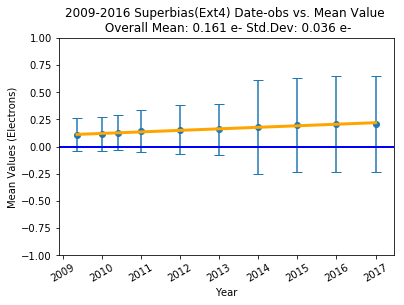

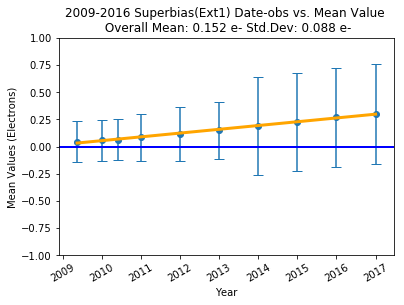

ValueError: could not broadcast input array from shape (9) into shape (10)

In [2]:
-

#Create astropy table
    
table1 = Table()
table1['Year'] = table_file_date
table1['Ext4 Mean(electrons)'] = file_mean1
table1['Ext4 Mean(electrons)'].format = '2.3f'
table1['Ext4 Std.Dev(electrons)'] = file_stddev1
table1['Ext4 Std.Dev(electrons)'].format = '2.3f'
table1['Ext1 Mean(electrons)'] = file_mean2
table1['Ext1 Mean(electrons)'].format = '2.3f'
table1['Ext1 Std.Dev(electrons)'] = file_stddev2
table1['Ext1 Std.Dev(electrons)'].format = '2.3f'
#table1['Number of Frames'] = Number_of_files
table1.write('2009-2016_Superbias_statistics.txt',format='ascii.fixed_width', overwrite=True)

In [40]:
os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/2009_crrg_fits/calwf3_test/')
List1=[]
List2=[]
#Year='2010a'
#print ('{} Bias File Chip1 SCI Histograms'.format(Year))
print('Name','         ','Date','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
for fitsName1 in sorted(glob.glob('*ref.fits')):
    fitsName1=np.array(fitsName1)
    fitsName1=np.append(List1,fitsName1)
    for i in range(len(fitsName1)):
        h = fits.open(fitsName1[i])
        sci_chip1=h[4].data
        dq_chip1=h[6].data
        sci_chip1[dq_chip1 !=0]=np.nan
#        print(h[0].header['Rootname'],h[0].header['Date-obs'],'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
        h.close()
        
        bins=np.linspace(0.0,4.0,50)
        n,bins,patches=plt.hist(sci_chip1[~np.isnan(sci_chip1)], 50, facecolor='g', alpha=0.50) 
       
        
        #Titles for the histogram
        plt.title("{} Chip1 SCI Histograms".format(h[0].header['rootname']))
        plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip1),"%.3f" % np.nanmin(sci_chip1)))
        plt.ylabel("Frequency")
        plt.yscale('log')
        plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip1),"%.3f" %np.nanstd(sci_chip1)), xy=(225, 175), xycoords='axes points',
                    size=12, bbox=dict(boxstyle='round', fc='w'))
        plt.savefig('{}_chip1_scidq_hist.png'.format(h[0].header['useafter']))
        plt.clf()
#    write_with_nan_c1_stats(filename='{}_bias_chip1_stats_DQ.txt'.format(Year))
      
        
        
print('')
#print ('{} Bias File Chip2 SCI Histograms'.format(Year))
print('Name','         ','Date','         ','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
for fitsName2 in sorted(glob.glob('*ref.fits')):
    fitsName2=np.array(fitsName2)
    fitsName2=np.append(List2,fitsName2)
    for i in range(len(fitsName2)):
        h = fits.open(fitsName2[i])
        sci_chip2=h[1].data
        dq_chip2=h[3].data
        sci_chip2[dq_chip2 !=0]=np.nan
#        print(h[0].header['Rootname'],h[0].header['Date-obs'],'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
        h.close()
        
        bins=np.linspace(0.0,4.0,50) 
        n,bins,patches=plt.hist(sci_chip2[~np.isnan(sci_chip2)], 50, facecolor='pink', alpha=0.50) 
        
        
        #Titles for the histogram
        plt.title("{} Chip2 SCI Histograms".format(h[0].header['rootname']))
        plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip2),"%.3f" % np.nanmin(sci_chip2)))
        plt.ylabel("Frequency")
        plt.yscale('log')
        plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip2),"%.3f" %np.nanstd(sci_chip2)), xy=(225, 175), xycoords='axes points',
                    size=12, bbox=dict(boxstyle='round', fc='w'))
        plt.savefig('{}_chip2_scidq_hist.png'.format(h[0].header['useafter']))
        plt.clf()
#    write_with_nan_c2_stats(filename='{}_bias_chip2_stats_DQ.txt'.format(Year)) 
    

Name           Date           Chip      Max          Min       Mean          Std Dev      Median

Name           Date           Chip      Max          Min       Mean          Std Dev      Median


In [41]:
os.chdir('/grp/hst/wfc3u/mmckay/2009biasfiles/2009_crrg_fits/calwf3_test/')
new=fits.open('final_bias_ref.fits')
sci_chip1=new[4].data
sci_chip2=new[1].data

dq_chip1=new[6].data
dq_chip2=new[3].data

err_chip1=new[5].data
err_chip2=new[2].data

sci_chip1[sci_chip1 ==0]=np.nan
sci_chip2[sci_chip2 ==0]=np.nan

err_chip1[err_chip1 ==0]=np.nan
err_chip2[err_chip2 ==0]=np.nan
Name=new[0].header['filename']
new.close()
r=5
print('Check data statistics')
print('Name','      \t\t','Chip','    ','Max','        ','Min','     ','Mean','        ','Std Dev' ,'    ','Median')
print(Name,'   ','chip1','   ',np.nanmax(sci_chip1),'  ',np.nanmin(sci_chip1),'  ', np.nanmean(sci_chip1),'     ',np.nanstd(sci_chip1),'   ',np.nanmedian(sci_chip1))
print(Name,'   ','chip2','   ',np.nanmax(sci_chip2),'  ',np.nanmin(sci_chip2),'  ', np.nanmean(sci_chip2),'     ',np.nanstd(sci_chip2),'   ',np.nanmedian(sci_chip2))
print('')
print(Name,'   ','chip1','   ',np.nanmax(err_chip1),'  ',np.nanmin(err_chip1),'  ', np.nanmean(err_chip1),'     ',np.nanstd(err_chip1),'   ',np.nanmedian(err_chip1))
print(Name,'   ','chip2','   ',np.nanmax(err_chip2),'  ',np.nanmin(err_chip2),'  ', np.nanmean(err_chip2),'     ',np.nanstd(err_chip2),'   ',np.nanmedian(err_chip2))

bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip1[~np.isnan(sci_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip1 SCI Histogram")
plt.title("Chip1 Check SCI Data Transfer")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip1),"%.3f" % np.nanmin(sci_chip1)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip1),"%.3f" %np.nanstd(sci_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('chip1_sci_check.png')
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(sci_chip2[~np.isnan(sci_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip2 SCI Histogram")
plt.title("Chip2 Check SCI Data Transfer")
plt.xlabel("Pixel Value Max={} Min={}".format("%.3f" % np.nanmax(sci_chip2),"%.3f" % np.nanmin(sci_chip2)))
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(sci_chip2),"%.3f" %np.nanstd(sci_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
#plt.savefig('New_mean_stacked_chip2_sci_hist.png')
plt.savefig('chip2_sci_check.png')
plt.clf()
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip1[~np.isnan(err_chip1)], 50, facecolor='blue', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip1 SCI Histogram")
plt.title("Chip1 Check ERR Data Transfer")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip1),"%.3f" %np.nanstd(err_chip1)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
plt.savefig('chip1_err_check.png')
plt.clf()


bins=np.linspace(-15,15,50) 
n,bins,patches=plt.hist(err_chip2[~np.isnan(err_chip2)], 50, facecolor='red', alpha=0.50) 
#Titles for the histogram
#plt.title("2010 Bias File Chip2 SCI Histogram")
plt.title("Chip2 Check ERR Data Transfer")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.yscale('log')
plt.annotate('Mean {} \nSigma {}'.format("%.3f" % np.nanmean(err_chip2),"%.3f" %np.nanstd(err_chip2)), xy=(225, 175), xycoords='axes points',
            size=12, bbox=dict(boxstyle='round', fc='w'))
#plt.savefig('New_mean_stacked_chip2_sci_hist.png')
plt.savefig('chip2_err_check.png')
plt.clf()

Check data statistics
Name       		 Chip      Max          Min       Mean          Std Dev      Median
u6n1741hi_bia.fits     chip1     4.90813    -5.1794    0.0756329       0.102792     0.0755576
u6n1741hi_bia.fits     chip2     7.22277    -4.84022    0.0327027       0.125275     0.0341967

u6n1741hi_bia.fits     chip1     2.59255    0.0901558    0.0947192       0.0103273     0.0946532
u6n1741hi_bia.fits     chip2     2.97235    0.0924657    0.0970438       0.00800578     0.0970267


In [28]:
os.chdir('/grp/hst/wfc3u/mmckay/TIR_test/stack/')

old_stack=fits.open('old_bias_crr_err_stacked_files.fits')
new_stack=fits.open('bias_crr_err_stacked_files.fits')

old_sci1=old_stack[0].data
new_sci1=new_stack[0].data

old_sci2=old_stack[2].data
new_sci2=new_stack[2].data

result1=old_sci1-new_sci1
result2=old_sci2-new_sci2

print(result1)
print(result2)

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]]
[[  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   0. ...,   0.   0.   0.]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


0.137332 0.0554649
Old1 mean 0.142349
Old2 mean 0.0575383
New1 mean 0.113449
New2 mean 0.0490541


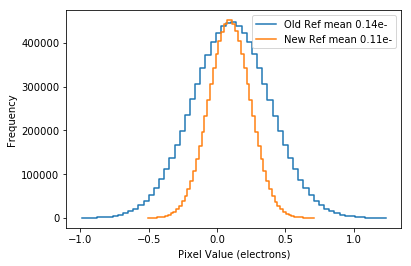

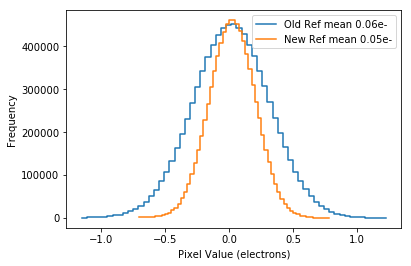

In [16]:
os.chdir('/grp/hst/wfc3r/mmckay/compare_old_2009_to_new_2009/')
import pylab as py
#Gain = 1.5
#electrons = counts(DN) * gain(e-/DN)
old=fits.open('u1r1346ri_bia.fits')
#print(old[1].header['*'])
old1=old[4].data
old1=old1*1.5
#old1[old1 == 0] = np.nan
old2=old[1].data
old2=old2*1.5
#old2[old2 == 0] = np.nan

#print(old2.shape)
#
#old2 = np.delete(old2, old2[:19,:]) #left overscan
#print(old2.shape)
#old2 = np.delete(old2, old2[:,:25]) #right overscan
#old2 = np.delete(old2, old2[:,4096:])
#old2 = np.delete(old2, old2[:,2048:2108])

old1_median=np.nanmean(old1)#*1.5
old2_median=np.nanmean(old2)#*1.5


print(old1_median, old2_median)

new=fits.open('1681902ti_bia.fits')
#print(new[1].header['*'])
new1=new[4].data
new1=new1*1.5
#new1[new1 == 0] = np.nan
new2=new[1].data
new2=new2*1.5
#new2[new2 == 0] = np.nan

new1_median=np.nanmean(new1)*1.5
new2_median=np.nanmean(new2)*1.5
#print(new1_median, new2_median)

percent_diff1= (((old1_median - new1_median)) / old1_median) * 100
percent_diff2= (((old2_median - new2_median)) / old2_median) * 100

diff1= ((old1_median - new1_median))
diff2= ((old2_median - new2_median))

diff_average=(diff1 + diff2)/2
#pd1 = 100*np.abs(old1_median - new1_median)/(np.median([old1_median,new1_median]))

#print(diff1,'(electrons)', diff2,'(electrons)',diff_average)
#print(percent_diff1,'%', percent_diff2, '%')

#old1[2052:,:] = np.nan #bottom overscan
#old1[:,:26] = np.nan #left overscan
#old1[:,4097:] = np.nan #right overscan
#old1[:,2049:2109] = np.nan #middle overscan
#
#new1[2052:,:] = np.nan #bottom overscan
#new1[:,:26] = np.nan #left overscan
#new1[:,4097:] = np.nan #right overscan
#new1[:,2049:2109] = np.nan #middle overscan
#
#old2[:20,:] =np.nan #top overscan
#old2[:,:26] =np.nan #left overscan
#old2[:,4097:] = np.nan #right overscan
#old2[:,2049:2109] =np.nan #middle overscan
#
#new2[:20,:] =np.nan #top overscan
#new2[:,:26] =np.nan #left overscan
#new2[:,4097:] = np.nan #right overscan
#new2[:,2049:2109] =np.nan #middle overscan
#



old1[old1 == 0] = np.nan
old2[old2 == 0] = np.nan
new1[new1 == 0] = np.nan
new2[new2 == 0] = np.nan

old1_mean=np.nanmean(old1)
old2_mean=np.nanmean(old2)
new1_mean=np.nanmean(new1)
new2_mean=np.nanmean(new2)

print('Old1 mean', old1_mean)
print('Old2 mean', old2_mean)
print('New1 mean', new1_mean)
print('New2 mean', new2_mean)

plt.clf()
diff1=(old1-new1)
diff2=(old2-new2)

sig_old1 = np.nanstd(old1); med_old1 = np.nanmedian(old1); h_old1, b_old1 = np.histogram(old1[~np.isnan(old1)],range=[med_old1-4*sig_old1,med_old1+4*sig_old1],bins=60)
sig_new1 = np.nanstd(new1); med_new1 = np.nanmedian(new1); h_new1, b_new1 = np.histogram(new1[~np.isnan(new1)],range=[med_new1-4*sig_new1,med_new1+4*sig_new1],bins=60)
sig_diff1 = np.nanstd(diff1); med_diff1 = np.nanmedian(diff1); h_diff1, b_diff1 = np.histogram(diff1[~np.isnan(diff1)],range=[med_diff1-3*sig_diff1,med_diff1+3*sig_diff1],bins=60)   
plt.clf()    
plt.show()

plt.step(b_old1[:-1],h_old1,label='Old Ref mean {}e-'.format("%.2f" % old1_mean))
plt.step(b_new1[:-1],h_new1,label='New Ref mean {}e-'.format("%.2f" % new1_mean))
plt.ylabel('Frequency')
plt.xlabel('Pixel Value (electrons)')
#plt.step(b_diff1[:-1],h_diff1)
plt.legend()
plt.show()
plt.clf()

sig_old2 = np.nanstd(old2); med_old2 = np.nanmedian(old2); h_old2, b_old2 = np.histogram(old2[~np.isnan(old2)],range=[med_old2-4*sig_old2,med_old2+4*sig_old2],bins=60)
sig_new2 = np.nanstd(new2); med_new2 = np.nanmedian(new2); h_new2, b_new2 = np.histogram(new2[~np.isnan(new2)],range=[med_new2-4*sig_new2,med_new2+4*sig_new2],bins=60)
sig_diff2 = np.nanstd(diff2); med_diff2 = np.nanmedian(diff2); h_diff2, b_diff2 = np.histogram(diff2[~np.isnan(diff2)],range=[med_diff2-3*sig_diff2,med_diff2+3*sig_diff2],bins=60)   
plt.step(b_old2[:-1],h_old2,label='Old Ref mean {}e-'.format("%.2f" % old2_mean))
plt.step(b_new2[:-1],h_new2,label='New Ref mean {}e-'.format("%.2f" % new2_mean))
plt.ylabel('Frequency')
plt.xlabel('Pixel Value (electrons)')
#plt.step(b_diff2[:-1],h_diff2)
plt.savefig('(Ext1){} Old Bias Ref vs New Bias Ref.png'.format(new[0].header['useafter']))
plt.legend()
plt.show()
plt.clf()



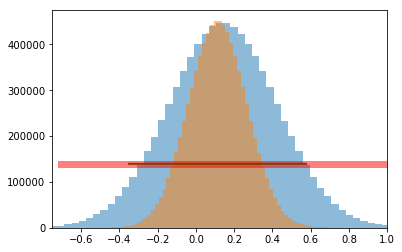

y4_min -7.26033 y4_max 10.8342
-1.12846555412
-0.687828268607
[  4.51725102e+05   5.95880413e-02   2.97516210e-01]
[  1.39159459e+05  -1.33923878e+01   4.01853393e+03]
139158.590531
139158.764688


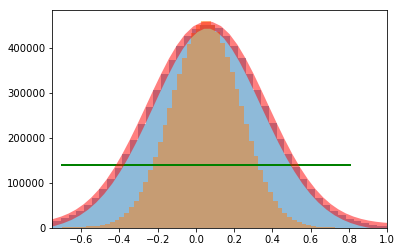

In [25]:
import pylab as py
import numpy as np
from scipy import optimize

#Chip1 2009 
plt.clf()
# Generate a 
y1 = old1[~np.isnan(old1)]
y2 = new1[~np.isnan(new1)]

#data = py.hist(y, range=[med_old1-3*sig_old1,med_old1+3*sig_old1], bins = 60)
#data1 = py.hist(y1, bins = 300,alpha=0.5)
#data2 = py.hist(y2, bins = 300,alpha=0.5)
data1 = py.hist(y1, range=[med_old1-4*sig_old1,med_old1+4*sig_old1], bins = 60,alpha=0.5)
data2 = py.hist(y2, range=[med_new1-4*sig_new1,med_new1+4*sig_new1], bins = 60,alpha=0.5)

# Equation for Gaussian
def f(x, a, b, c):
    return a * py.exp(-(x - b)**2.0 / (2 * c**2))

# Generate data from bins as a set of points
#x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
x1 = [0.5 * (data1[1][i] + data1[1][i+1]) for i in range(len(data1[1])-1)]
x2 = [0.5 * (data2[1][j] + data2[1][j+1]) for j in range(len(data2[1])-1)]

y1 = data1[0]
y2 = data2[0]

popt1, pcov1 = optimize.curve_fit(f, x1, y1)
popt2, pcov2 = optimize.curve_fit(f, x2, y2)


#x_fit1 = py.linspace(x1[0], x1[-1], 300)
#x_fit2 = py.linspace(x2[0], x2[-1], 300)

x_fit1 = py.linspace(med_old1-3*sig_old1,med_old1+3*sig_old1,60)
x_fit2 = py.linspace(med_new1-3*sig_new1,med_new1+3*sig_new1,60)

#x_fit = py.linspace(x[0], x[-1], 60)
y_fit1 = f(x_fit1, *popt1)
y_fit2 = f(x_fit2, *popt2)

plt.plot(x_fit2, y_fit2, lw=2, color="g", alpha=1)
plt.plot(x_fit1, y_fit1, lw=7, color="r", alpha=0.5)
#plt.plot(x_fit2, y_fit2, lw=2, color="g", alpha=1)

plt.xlim(-0.75, 1)
plt.show()
#print(y_fit1)

#-------------------------------------------------------------------
#Chip2 2009 
plt.clf()
# Generate a 
y3 = old2[~np.isnan(old2)]
y4 = new2[~np.isnan(new2)]
print('y4_min',np.min(y4),'y4_max',np.max(y4))

data3 = py.hist(y3, range=[med_old2-4*sig_old2,med_old2+4*sig_old2], bins = 60,alpha=0.5)
data4 = py.hist(y4, range=[med_new2-4*sig_new2,med_new2+4*sig_new2], bins = 60,alpha=0.5)
#data3 = py.hist(y3, bins = 300,alpha=0.5)
#data4 = py.hist(y4, bins = 300,alpha=0.5)

# Equation for Gaussian
def f(x, a, b, c):
    return a * py.exp(-(x - b)**2.0 / (2 * c**2))
    print(a,x,b,c)

# Generate data from bins as a set of points
#x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
x3 = [0.5 * (data3[1][i] + data3[1][i+1]) for i in range(len(data3[1])-1)]
x4 = [0.5 * (data4[1][j] + data4[1][j+1]) for j in range(len(data4[1])-1)]

y3 = data3[0]
y4 = data4[0]

#print(x3)
print(np.min(x3))
print(np.min(x4))

popt3, pcov3 = optimize.curve_fit(f, x3, y3)
popt4, pcov4 = optimize.curve_fit(f, x4, y4)

print(popt3)
print(popt4)
#print(pcov3)

#x_fit1 = py.linspace(x1[0], x1[-1], 300)
#x_fit2 = py.linspace(x2[0], x2[-1], 300)

x_fit3 = py.linspace(med_old2-4*sig_old2,med_old2+4*sig_old2,60)
x_fit4 = py.linspace(med_new2-4*sig_new2,med_new2+4*sig_new2,60)

#x_fit = py.linspace(x[0], x[-1], 60)
y_fit3 = f(x_fit3, *popt3)
print(np.min(y_fit4))
print(np.max(y_fit4))

y_fit4 = f(x_fit4, *popt4)

plt.plot(x_fit4, y_fit4, lw=2, color="g", alpha=1)
plt.plot(x_fit3, y_fit3, lw=7, color="r", alpha=0.5)
#plt.plot(x_fit2, y_fit2, lw=2, color="g", alpha=1)

plt.xlim(-0.75, 1)
#plt.ylim(0, 10)
plt.show()
#print(y_fit3)
#print(y_fit4)





In [7]:
help(optimize.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

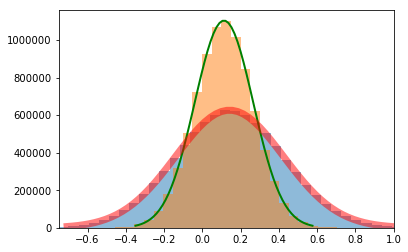

NameError: name 'y_fit22' is not defined

In [4]:
#Chip2 2009 
plt.clf()
# Generate a 
y1 = old1[~np.isnan(old1)]
y2 = new1[~np.isnan(new1)]

#data = py.hist(y, range=[med_old1-3*sig_old1,med_old1+3*sig_old1], bins = 60)
data1 = py.hist(y1, bins = 300,alpha=0.5)
data2 = py.hist(y2, bins = 300,alpha=0.5)

# Equation for Gaussian
def f(x, a, b, c):
    return a * py.exp(-(x - b)**2.0 / (2 * c**2))

# Generate data from bins as a set of points
#x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
x1 = [0.5 * (data1[1][i] + data1[1][i+1]) for i in range(len(data1[1])-1)]
x2 = [0.5 * (data2[1][j] + data2[1][j+1]) for j in range(len(data2[1])-1)]

y1 = data1[0]
y2 = data2[0]

popt1, pcov1 = optimize.curve_fit(f, x1, y1)
popt2, pcov2 = optimize.curve_fit(f, x2, y2)


#x_fit1 = py.linspace(x1[0], x1[-1], 300)
#x_fit2 = py.linspace(x2[0], x2[-1], 300)

x_fit1 = py.linspace(med_old1-3*sig_old1,med_old1+3*sig_old1,60)
x_fit2 = py.linspace(med_new1-3*sig_new1,med_new1+3*sig_new1,60)

#x_fit = py.linspace(x[0], x[-1], 60)
y_fit1 = f(x_fit1, *popt1)
y_fit2 = f(x_fit2, *popt2)

plt.plot(x_fit2, y_fit2, lw=2, color="g", alpha=1)
plt.plot(x_fit1, y_fit1, lw=7, color="r", alpha=0.5)
#plt.plot(x_fit2, y_fit2, lw=2, color="g", alpha=1)

plt.xlim(-0.75, 1)
plt.show()
print(y_fit2)


In [5]:
plt.clf()
n,bins,patches=plt.hist(old1[~np.isnan(old1)],range=[med_old1-3*sig_old1,med_old1+3*sig_old1],bins=60, color='purple', alpha=0.50) 


#Titles for the histogram
#plt.title("{} Histogram of chip 2 with DQ.".format(h[0].header['Rootname']))
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
#red_patch = mpatches.Patch(color='white', label='Mean {}'.format("%.5f" % mean4))
#blue_patch =mpatches.Patch(color='white', label='sigma {}'.format("%.5f" %sigma4)) 
#plt.legend(handles=[red_patch,blue_patch])

#Curve fit
def f(x, a, b, c): #function for gaussian curve
    return a * py.exp(-(x - b)**2.0 / (2 * c**2)) #Guassian equation
from scipy import optimize 
x = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n[1])-1)]
n=data[0]
#since bins need to have an extra value to complete the bin width (here bin =50) I had to
#subtract a value to match the deminsions of the n (here n=49)
try:
    popt,pcov = optimize.curve_fit(f, x, n)
except RuntimeError:
    print("Error - curve_fit failed")
##optimize.curve_fit found my values(a,b,c) for the function f for popt(show parameter)
y_fit = f(bins, *popt) #fit y data to to histogram = function f where x= bins and a,b,c set from *popt
x_fit = py.linspace(bins[0], bins[-1], 61) #same as bins but show setup
plt.plot(x_fit,y_fit,'b--', linewidth=4) #plots curve
#plt.savefig('{}_flt_chip2dq_hist_.pdf'.format(h[0].header['Rootname']))
plt.show()
plt.clf()   
#print(y_fit)
#os.system('mv *.pdf  /grp/hst/wfc3v/mmckay/2009biasfiles/flt_chip2dq_hist') 

TypeError: object of type 'numpy.float64' has no len()

In [23]:
import pylab as py
import numpy as np
from scipy import optimize
plt.clf()
# Generate a 
y = old1[~np.isnan(old1)]
data = py.hist(y,range=[med_old1-3*sig_old1,med_old1+3*sig_old1],bins=60)

# Equation for Gaussian
def f(x, a, b, c):
    return a * py.exp(-(x - b)**2.0 / (2 * c**2))

# Generate data from bins as a set of points 
x = [0.5 * (data[1][i] + data[1][i+1]) for i in range(len(data[1])-1)]
y = data[0]
print(y)
popt, pcov = optimize.curve_fit(f, x, y)

x_fit = py.linspace(x[0], x[-1], 60)
y_fit = f(x_fit, *popt)

py.plot(x_fit, y_fit, lw=4, color="r")
py.xlim(-0.75, 1.00)
py.show()

SyntaxError: invalid syntax (<ipython-input-23-d0f3c076ab4f>, line 15)

In [29]:
mean=np.nanmean(old1); sd=np.nanstd(old1); x=b_old1
print('STDDEV and Mean_oldchip1',sd,mean)
FWHM_old1 = 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))
#print(FWHM_old1)

mean=np.nanmean(new1); sd=np.nanstd(new1); x=b_new1
print('STDDEV and Mean_newchip1',sd,mean)
FWHM_new1 = 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))
#print(FWHM_new1)

#ratio_FWHM = FWHM_old1/FWHM_new1
#print(ratio_FWHM)

#######Chip2
mean=np.nanmean(old2); sd=np.nanstd(old2); x=b_old2
print('STDDEV and Mean_oldchip2',sd,mean)
FWHM_old2 = 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))
#print(FWHM_old2)

mean=np.nanmean(new2); sd=np.nanstd(new2); x=b_new2
print('STDDEV and Mean_newchip2',sd,mean)
FWHM_new2 = 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))
#print(FWHM_new2)

#ratio_FWHM2 = FWHM_old2/FWHM_new2
#print(ratio_FWHM2)

STDDEV and Mean_oldchip1 0.282983 0.142349
STDDEV and Mean_newchip1 0.154188 0.113449
STDDEV and Mean_oldchip2 0.301869 0.0575383
STDDEV and Mean_newchip2 0.187913 0.0490541


In [12]:
max=np.nanmax((old1))
min=np.nanmin(old1)
print(max,min)
x1 = old1

values, bins, _ = plt.hist(x1[~np.isnan(x1)])
area1 = sum(np.diff(bins)*values)
print(area)
plt.plot(bins,values)
plt.show()

sig_old1 = np.nanstd(old1); med_old1 = np.nanmedian(old1); h_old1, b_old1 = np.histogram(old1[~np.isnan(old1)],range=[med_old1-3*sig_old1,med_old1+3*sig_old1],bins=60)
area1 = sum(np.diff(b_old1)*h_old1)
print(area1)

#max=np.nanmax((new1))
#min=np.nanmin(new1)
#print(max,min)
#x2 = old2
#
#h_old2, b_old2 =np.histogram(old2[~np.isnan(old2)],range=[med_old2-3*sig_old2,med_old2+3*sig_old2],bins=60)
##values, bins, _ = plt.hist(x2[~np.isnan(x2)])
#area2 = sum(np.diff(b_old2)*h_old2)
#print(area2)


#Area under the histograms
#the area under the curve should equal the sqrt(n) n= the number of files used to make file

#Area of old 2009 histogram chip1
#area_oldc1_09 = sum(np.diff(b_old1)*h_old1)
#area_oldc1_09 = area_oldc1_09**2
#sqrt_of_N_oldc1 = np.sqrt(120)
#print("Area of old 2009 chip1:", area_oldc1_09)
#print('Square-root of N old 2009 chip1', sqrt_of_N_oldc1)
#
##Area of new 2009 histogram chip1
#area_newc1_09 = sum(np.diff(b_new1)*h_new1)
#area_newc1_09 = area_newc1_09**2
#sqrt_of_N_newc1 = np.sqrt(494)
#print("Area of new 2009 chip1:", area_newc1_09)
#print('Square-root of N new 2009 chip1:', sqrt_of_N_newc1)
#print('')
##Area of old 2009 histogram chip2
#area_oldc2_09 = sum(np.diff(b_old2)*h_old2)
#area_oldc2_09 = area_oldc2_09**2
#sqrt_of_N_oldc2 = np.sqrt(120)
#print("Area of old 2009 chip2:", area_oldc2_09)
#print('Square-root of N old 2009 chip2:', sqrt_of_N_oldc2)
#
##Area of new 2009 histogram chip2
#area_newc2_09 = sum(np.diff(b_new2)*h_new2)
#area_newc2_09 = area_newc2_09**2
#sqrt_of_N_newc2 = np.sqrt(494)
#print("Area of new 2009 chip2:", area_newc2_09)
#print('Square-root of N new 2009 chip2:', sqrt_of_N_newc2)
#print('')
##Ratios of the Area and N values
#
##Area ratio chip1
#
#Area_chip1_ratio = area_newc1_09/area_oldc1_09
#print('Area ratio for chip1', Area_chip1_ratio)
#
#Area_chip2_ratio = area_newc2_09/area_oldc2_09
#print('Area ratio for chip2', Area_chip2_ratio)
#print('')
#
##Number of files ratio
#
#Sqrt_of_N_chip1_ratio = sqrt_of_N_oldc1/sqrt_of_N_newc1
#print('Sqrt of N ratio for chip1', Sqrt_of_N_chip1_ratio)
#
#Sqrt_of_N_chip2_ratio = sqrt_of_N_oldc2/sqrt_of_N_newc2
#print('Sqrt of N ratio for chip2', Sqrt_of_N_chip2_ratio)
#print('')
#
#ratio_oldN_newN = 120/494
#print('Ratio of oldN/newN', ratio_oldN_newN)

9.56779 -0.994405
8691124.65592


ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

0.158945605159 0.0964875854552
0.113999851048 0.0595869775862
0.0449457541108 (electrons) 0.036900607869 (electrons) average of difference 0.0409231809899
28.2774437619 % 38.2438918903 %


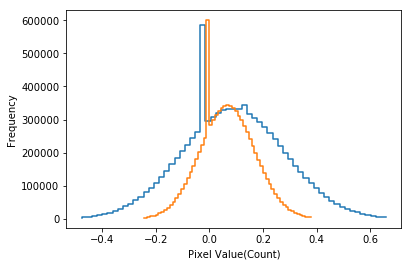

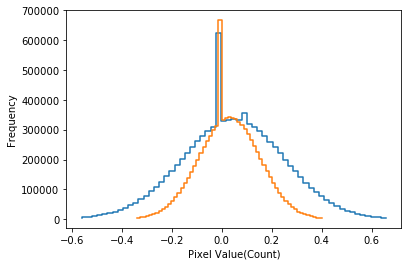

In [15]:
os.chdir('/grp/hst/wfc3r/mmckay/compare old 2009 to new 2009/')
#Gain = 1.5
#electrons = counts(DN) * gain(e-/DN)
old=fits.open('v1k21345i_bia.fits')
#print(old[1].header['*'])
old1=old[4].data    
#old1[old1 == 0] = np.nan
old2=old[1].data
#old2[old2 == 0] = np.nan

old1_median=np.nanmean(old1)*1.5
old2_median=np.nanmean(old2)*1.5


print(old1_median, old2_median)

new=fits.open('16819037i_bia.fits')
#print(new[1].header['*'])
new1=new[4].data
#new1[new1 == 0] = np.nan
new2=new[1].data
#new2[new2 == 0] = np.nan

new1_median=np.nanmean(new1)*1.5
new2_median=np.nanmean(new2)*1.5
print(new1_median, new2_median)

percent_diff1= (((old1_median - new1_median)) / old1_median) * 100
percent_diff2= (((old2_median - new2_median)) / old2_median) * 100

diff1= ((old1_median - new1_median))
diff2= ((old2_median - new2_median))

diff_average=(diff1 + diff2)/2
#pd1 = 100*np.abs(old1_median - new1_median)/(np.median([old1_median,new1_median]))

print(diff1,'(electrons)', diff2,'(electrons)','average of difference',diff_average)
print(percent_diff1,'%', percent_diff2, '%')

#old1[old1 == 0] = np.nan
#old2[old2 == 0] = np.nan
#new1[new1 == 0] = np.nan
#new2[new2 == 0] = np.nan

plt.clf()
diff1=(old1-new1)
diff2=(old2-new2)
sig_old1 = np.nanstd(old1); med_old1 = np.nanmedian(old1); h_old1, b_old1 = np.histogram(old1[~np.isnan(old1)],range=[med_old1-3*sig_old1,med_old1+3*sig_old1],bins=60)
sig_new1 = np.nanstd(new1); med_new1 = np.nanmedian(new1); h_new1, b_new1 = np.histogram(new1[~np.isnan(new1)],range=[med_new1-3*sig_new1,med_new1+3*sig_new1],bins=60)
sig_diff1 = np.nanstd(diff1); med_diff1 = np.nanmedian(diff1); h_diff1, b_diff1 = np.histogram(diff1[~np.isnan(diff1)],range=[med_diff1-3*sig_diff1,med_diff1+3*sig_diff1],bins=60)   
plt.step(b_old1[:-1],h_old1)
plt.step(b_new1[:-1],h_new1)
plt.ylabel('Frequency')
plt.xlabel('Pixel Value(Count)')
plt.savefig('(Ext4){} Old Bias Ref vs New Bias Ref.png'.format(new[0].header['useafter']))
#plt.step(b_diff1[:-1],h_diff1)

plt.show()
plt.clf()

sig_old2 = np.nanstd(old2); med_old2 = np.nanmedian(old2); h_old2, b_old2 = np.histogram(old2[~np.isnan(old2)],range=[med_old2-3*sig_old2,med_old2+3*sig_old2],bins=60)
sig_new2 = np.nanstd(new2); med_new2 = np.nanmedian(new2); h_new2, b_new2 = np.histogram(new2[~np.isnan(new2)],range=[med_new2-3*sig_new2,med_new2+3*sig_new2],bins=60)
sig_diff2 = np.nanstd(diff2); med_diff2 = np.nanmedian(diff2); h_diff2, b_diff2 = np.histogram(diff2[~np.isnan(diff2)],range=[med_diff2-3*sig_diff2,med_diff2+3*sig_diff2],bins=60)   
plt.step(b_old2[:-1],h_old2)
plt.step(b_new2[:-1],h_new2)
plt.ylabel('Frequency')
plt.xlabel('Pixel Value(Count)')
#plt.step(b_diff2[:-1],h_diff2)
plt.savefig('(Ext1){} Old Bias Ref vs New Bias Ref.png'.format(new[0].header['useafter']))
plt.show()
plt.clf()

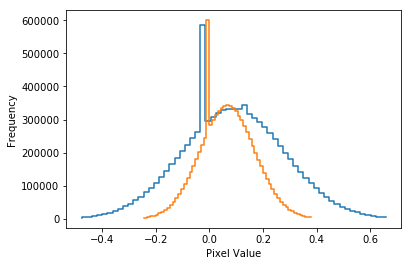

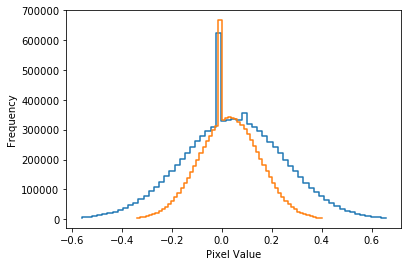

In [57]:
#old1[old1 == 0] = np.nan
#old2[old2 == 0] = np.nan
#new1[new1 == 0] = np.nan
#new2[new2 == 0] = np.nan

plt.clf()
diff1=(old1-new1)
diff2=(old2-new2)
sig_old1 = np.nanstd(old1); med_old1 = np.nanmedian(old1); h_old1, b_old1 = np.histogram(old1[~np.isnan(old1)],range=[med_old1-3*sig_old1,med_old1+3*sig_old1],bins=60)
sig_new1 = np.nanstd(new1); med_new1 = np.nanmedian(new1); h_new1, b_new1 = np.histogram(new1[~np.isnan(new1)],range=[med_new1-3*sig_new1,med_new1+3*sig_new1],bins=60)
sig_diff1 = np.nanstd(diff1); med_diff1 = np.nanmedian(diff1); h_diff1, b_diff1 = np.histogram(diff1[~np.isnan(diff1)],range=[med_diff1-3*sig_diff1,med_diff1+3*sig_diff1],bins=60)   
plt.step(b_old1[:-1],h_old1)
plt.step(b_new1[:-1],h_new1)
plt.ylabel('Frequency')
plt.xlabel('Pixel Value(Count)')
plt.savefig('(Ext4){} Old Bias Ref vs New Bias Ref.png'.format(new[0].header['useafter']))
#plt.step(b_diff1[:-1],h_diff1)

plt.show()
plt.clf()

sig_old2 = np.nanstd(old2); med_old2 = np.nanmedian(old2); h_old2, b_old2 = np.histogram(old2[~np.isnan(old2)],range=[med_old2-3*sig_old2,med_old2+3*sig_old2],bins=60)
sig_new2 = np.nanstd(new2); med_new2 = np.nanmedian(new2); h_new2, b_new2 = np.histogram(new2[~np.isnan(new2)],range=[med_new2-3*sig_new2,med_new2+3*sig_new2],bins=60)
sig_diff2 = np.nanstd(diff2); med_diff2 = np.nanmedian(diff2); h_diff2, b_diff2 = np.histogram(diff2[~np.isnan(diff2)],range=[med_diff2-3*sig_diff2,med_diff2+3*sig_diff2],bins=60)   
plt.step(b_old2[:-1],h_old2)
plt.step(b_new2[:-1],h_new2)
plt.ylabel('Frequency')
plt.xlabel('Pixel Value(Count)')
#plt.step(b_diff2[:-1],h_diff2)
plt.savefig('(Ext1){} Old Bias Ref vs New Bias Ref.png'.format(new[0].header['useafter']))
plt.show()
plt.clf()

In [58]:
os.chdir('/grp/hst/wfc3r/mmckay/2015biasfiles/2015_crrej_flts/')
bias_file=glob.glob('*.fits')
for i in bias_file[0:1]:
    hdu=fits.open(i)
    print(hdu[0].header['*'])
#    sci_ext4=hdu[4].data
#    sci_ext1=hdu[1].data
    hdu.close()

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                   16                                                  NAXIS   =                    0                                                  EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            DATE    = '2017-03-21' / date this file was written (yyyy-mm-dd)                NEXTEND =                    6 / Number of standard extensions                  FILENAME= 'imam11586_flt.fits' / name of file                                   FILETYPE= 'SCI      '          / type of data found in data file                                                                                                TELESCOP= 'HST'                / telesco

AmpA Dark area mean = 0.170621
AmpA Light area mean = 0.109279


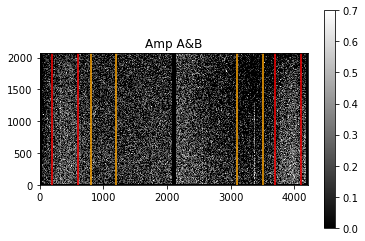

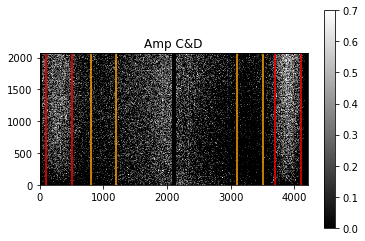

<function matplotlib.pyplot.clf>

In [45]:
os.chdir('/grp/hst/wfc3r/mmckay/Final_full_frame_reference_files/')
hdu = fits.open('2009_final_bias_ref.fits')

sci_chip1 = hdu[4].data
sci_chip2 = hdu[1].data

sci_chip1 = sci_chip1 * 1.5
sci_chip2 = sci_chip2 * 1.5


ampA_dark_area = sci_chip1[19:,200:600]
ampA_dark_mean = np.mean(ampA_dark_area)
print('AmpA Dark area mean =',ampA_dark_mean)

ampA_light_area = sci_chip1[19:,800:1200]
ampA_light_mean = np.mean(ampA_light_area)
print('AmpA Light area mean =',ampA_light_mean)

plt.imshow(sci_chip1, origin='lower', cmap='gray', vmin=0, vmax=.7)
plt.colorbar()
plt.title('Amp A&B')

#2D residual (light regions)
plt.axvline(x=200, color = 'r')
plt.axvline(x=600, color = 'r')
plt.axvline(x=3700, color = 'r')
plt.axvline(x=4100, color = 'r')

#The dark regions
plt.axvline(x=800, color = 'orange')
plt.axvline(x=1200, color = 'orange')
plt.axvline(x=3100, color = 'orange')
plt.axvline(x=3500, color = 'orange')
plt.show()
plt.clf


plt.imshow(sci_chip2, origin='lower', cmap='gray', vmin=0, vmax=.7)
plt.colorbar()
plt.title('Amp C&D')

#2D residual (light regions)
plt.axvline(x=100, color = 'r')
plt.axvline(x=500, color = 'r')
plt.axvline(x=3700, color = 'r')
plt.axvline(x=4100, color = 'r')

#The dark regions
plt.axvline(x=800, color = 'orange')
plt.axvline(x=1200, color = 'orange')
plt.axvline(x=3100, color = 'orange')
plt.axvline(x=3500, color = 'orange')
plt.show()
plt.clf


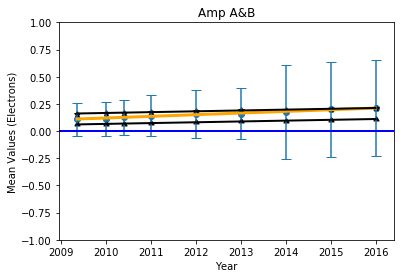

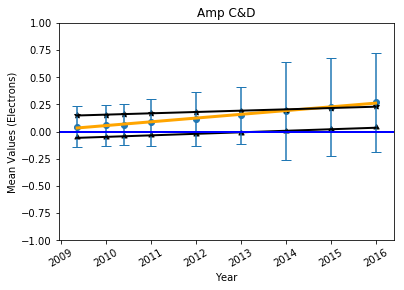

In [49]:
os.chdir('/grp/hst/wfc3r/mmckay/all_current_bias_ref_files_aug2017/')

list=sorted(glob.glob('*.fits')) 
file_mean1=[]
file_mean2=[]
file_date=[]
file_stddev1=[]
file_stddev2=[]
table_file_date=[]
Number_of_files=[494,492,524,347,246,219,52,52,53]

AmpAB_light_region = []
AmpAB_dark_region = []
AmpAB_all_light_mean_values = []
AmpAB_all_dark_mean_values = []

AmpCD_light_region = []
AmpCD_dark_region = []
AmpCD_all_light_mean_values = []
AmpCD_all_dark_mean_values = []

for im in list:
    h = fits.open(im)
    sci_chip1=h[4].data
    sci_chip2=h[1].data
    dq_chip1=h[6].data
    dq_chip2=h[3].data
    date=h[0].header['useafter']
    file_date=np.append(file_date,date)
    
    sci_chip1 = sci_chip1 * 1.5
    sci_chip2 = sci_chip2 * 1.5
    
    #Calculate the overall value of the EXT1
    file_mean1=np.append(file_mean1,np.nanmean(sci_chip1))
    file_mean2=np.append(file_mean2,np.nanmean(sci_chip2))
    file_stddev1=np.append(file_stddev1,np.nanstd(sci_chip1))
    file_stddev2=np.append(file_stddev2,np.nanstd(sci_chip2))
    
    Mean_c1=np.mean(file_mean1)
    STD_c1 =np.std(file_mean1)
    Mean_c2=np.mean(file_mean2)
    STD_c2 =np.std(file_mean2) 

    #EXT 4
    #Calculating the average for the 2D residual regions and appending the value to a list
    AmpA_light_region = sci_chip1[19:,100:500]
    AmpB_light_region = sci_chip1[19:,3700:4100]
    AmpAB_light_region = np.append(AmpAB_light_region, AmpA_light_region)
    #print(AmpAB_light_region.shape)
    
    AmpAB_light_region = np.append(AmpAB_light_region, AmpB_light_region)
    #print(AmpAB_light_region.shape)
    
    AmpAB_light_region_mean_values = np.mean(AmpAB_light_region)
    #print(AmpAB_light_region_mean_values)
    
    AmpAB_all_light_mean_values = np.append(AmpAB_all_light_mean_values, AmpAB_light_region_mean_values)
    #print(AmpAB_all_light_mean_values.shape)
    
    #Calculating the average for the dark regions and appending the value to a list
    AmpA_dark_region  = sci_chip1[19:,800:1200]
    AmpB_dark_region  = sci_chip1[19:,3100:3500] 
    
    AmpAB_dark_region = np.append(AmpAB_dark_region, AmpA_dark_region)
    #print(AmpAB_light_region.shape)
    
    AmpAB_dark_region = np.append(AmpAB_dark_region, AmpB_dark_region)
    #print(AmpAB_light_region.shape)
    
    AmpAB_dark_region_mean_values = np.mean(AmpAB_dark_region)
    #print(AmpAB_dark_region_mean_values)
    
    AmpAB_all_dark_mean_values = np.append(AmpAB_all_dark_mean_values, AmpAB_dark_region_mean_values)
    #print(AmpAB_all_dark_mean_values.shape)
    
    #EXT 1
    #Calculating the average for the 2D residual regions and appending the value to a list
    AmpC_light_region = sci_chip2[:2051,200:600]
    AmpD_light_region = sci_chip2[:2051,3700:4100]
    AmpCD_light_region = np.append(AmpCD_light_region, AmpC_light_region)
    #print(AmpAB_light_region.shape)
    
    AmpCD_light_region = np.append(AmpCD_light_region, AmpD_light_region)
    #print(AmpAB_light_region.shape)
    
    AmpCD_light_region_mean_values = np.mean(AmpCD_light_region)
    #print(AmpAB_light_region_mean_values)
    
    AmpCD_all_light_mean_values = np.append(AmpCD_all_light_mean_values, AmpCD_light_region_mean_values)
    #print(AmpAB_all_light_mean_values.shape)
    
    #Calculating the average for the dark regions and appending the value to a list
    AmpC_dark_region  = sci_chip2[:2051,800:1200]
    AmpD_dark_region  = sci_chip2[:2051,3100:3500] 
    
    AmpCD_dark_region = np.append(AmpCD_dark_region, AmpC_dark_region)
    #print(AmpAB_light_region.shape)
    
    AmpCD_dark_region = np.append(AmpCD_dark_region, AmpD_dark_region)
    #print(AmpAB_light_region.shape)
    
    AmpCD_dark_region_mean_values = np.mean(AmpCD_dark_region)
    #print(AmpAB_dark_region_mean_values)
    
    AmpCD_all_dark_mean_values = np.append(AmpCD_all_dark_mean_values, AmpCD_dark_region_mean_values)
    #print(AmpAB_all_dark_mean_values.shape)    
    #astropy table lists
    table_date=date[6:11]
    #print(table_date)
    table_file_date = np.append(table_file_date, table_date)
    h.close()
    
file_date = [pd.to_datetime(d,format=None) for d in file_date]
file_date = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date]
x = mdates.date2num(file_date)
    
#line fit calculations
AmpAB_light_polyfit=np.polyfit(x,AmpAB_all_light_mean_values,1)
AmpAB_light_polyfit_data=((AmpAB_light_polyfit[0]*x + AmpAB_light_polyfit[1]))

AmpAB_dark_polyfit=np.polyfit(x,AmpAB_all_dark_mean_values,1)
AmpAB_dark_polyfit_data=((AmpAB_dark_polyfit[0]*x + AmpAB_dark_polyfit[1]))

AmpCD_light_polyfit=np.polyfit(x,AmpCD_all_light_mean_values,1)
AmpCD_light_polyfit_data=((AmpCD_light_polyfit[0]*x + AmpCD_light_polyfit[1]))

AmpCD_dark_polyfit=np.polyfit(x,AmpCD_all_dark_mean_values,1)
AmpCD_dark_polyfit_data=((AmpCD_dark_polyfit[0]*x + AmpCD_dark_polyfit[1]))

polyfit1=np.polyfit(x,file_mean1,1)
polyfit1_data=((polyfit1[0]*x + polyfit1[1]))
   
polyfit2=np.polyfit(x,file_mean2,1)
polyfit2_data=((polyfit2[0] * x + polyfit2[1]))

plt.plot(x, polyfit1_data,'orange',linewidth=3)
plt.plot(x, AmpAB_light_polyfit_data, 'black', linewidth=2)
plt.plot(x, AmpAB_dark_polyfit_data, 'black', linewidth=2)
plt.scatter(file_date,file_mean1)
plt.scatter(file_date, AmpAB_all_light_mean_values, color='black',marker=(5, 1))
plt.scatter(file_date, AmpAB_all_dark_mean_values, color='black', marker=(3, 1))
plt.errorbar(file_date,file_mean1,yerr=file_stddev1,capsize=5, fmt='none')
plt.axhline(y=0, linewidth=2, color='blue')
plt.xlabel('Year')
plt.ylabel('Mean Values (Electrons)')
plt.ylim(-1,1)
plt.title('Amp A&B')
plt.savefig('ext4_test.png')
plt.show()
plt.clf()    


plt.plot(x, polyfit2_data, 'orange', linewidth = 3)
plt.plot(x, AmpCD_light_polyfit_data, 'black', linewidth=2)
plt.plot(x, AmpCD_dark_polyfit_data, 'black', linewidth=2)
plt.scatter(file_date, file_mean2)
plt.scatter(file_date, AmpCD_all_light_mean_values, color='black',marker=(5, 1))
plt.scatter(file_date, AmpCD_all_dark_mean_values, color='black', marker=(3, 1))
plt.errorbar(file_date, file_mean2, yerr = file_stddev2, capsize = 5, fmt = 'none')
plt.axhline(y=0, xmin = -100, xmax = 100, linewidth = 2, color = 'blue')
plt.xlabel('Year')
plt.ylabel('Mean Values (Electrons)')
plt.ylim(-1, 1)
plt.title('Amp C&D')
plt.xticks(rotation = 30)
plt.savefig('ext1_test.png')
plt.show()
plt.clf()     
    
    
    
    

#Create astropy table
    
table1 = Table()
table1['Year'] = table_file_date
table1['AmpA&B Residual Regions Mean Values'] = AmpAB_all_light_mean_values
table1['AmpA&B Residual Regions Mean Values'].format = '2.3f'
table1['AmpA&B Dark Regions Mean Values'] = AmpAB_all_dark_mean_values
table1['AmpA&B Dark Regions Mean Values'].format = '2.3f'
table1['AmpC&D Residual Regions Mean Values'] = AmpCD_all_light_mean_values
table1['AmpC&D Residual Regions Mean Values'].format = '2.3f'
table1['AmpC&D Dark Regions Mean Values'] = AmpCD_all_dark_mean_values
table1['AmpC&D Dark Regions Mean Values'].format = '2.3f'
#table1['Number of Frames'] = Number_of_files
table1.write('test_region.txt',format='ascii.fixed_width', overwrite=True)

In [15]:
828000+828000

1656000

In [16]:
1656000+828000

2484000